## 1.1 Beelden

*  dataset (MIT-license):
https://public.roboflow.com/object-detection/self-driving-car/3/download/yolov8
Cars are probably the lines that start with 1
https://public.roboflow.com/object-detection/self-driving-car
*  dataset-overview:
https://www.cityscapes-dataset.com/dataset-overview/
*  connecteren Google Drive met collab:
zie https://www.youtube.com/watch?v=8HvugBq5NKg
*  onderstaande code gaat uit van 2 folders die deze dataset bevatten: all_images en all_labels

In [1]:
#Definiëren van de sample size en de grootte van de uiteindelijke dataset
#dataset is kleiner omdat we de images die trucks bevatten (zoals gedetecteerd via de predict functie uit Yolo) uitzuiveren
sample_size = 2000
total_images_dataset = 504

In [2]:
import os
#Declareren waar de images en labels van de Cityscapes dataset staan (na upload van deze images en labels naar Google Drive)
source_folder_labels = "./labels"
source_folder_images = "./images"

#Declareren van de folders die in de notebook gebruikt worden
sample_folder = "./sampleSize"
sample_folder_size = sample_folder + str(sample_size)
sample_folder_predict = os.path.join(sample_folder_size, "Yolo_output","predict","labels")
sample_folder_size_images = os.path.join(sample_folder_size, "images")
sample_folder_size_labels = os.path.join(sample_folder_size, "labels")
training_sets_folder = os.path.join(sample_folder_size, "training_sets")
bounding_box_folder = os.path.join(sample_folder_size, "images_bounding_boxes")

In [14]:
#tellen aantal beelden in de dataset
import os
all_images = [f for f in os.listdir(source_folder_images)]
print("totaal aantal beelden in de folder geupload in google drive:", len(all_images))
all_labels = [f for f in os.listdir(source_folder_labels)]
print("totaal aantal labels in de folder geupload in google drive:", len(all_labels))

totaal aantal beelden in de folder geupload in google drive: 29800
totaal aantal labels in de folder geupload in google drive: 29800


### 1.1.1 Beelden samplen

In [15]:
#functie definitie
#input: sample_size
#returns 2 folders (labels en images) in de sample_size folder
import os
import random
import shutil

def select_random_txt_files(num_files):
    # Create destination folders if it doesn't exist
    if not os.path.exists(sample_folder_size_images):
        os.makedirs(sample_folder_size_images)
    if not os.path.exists(sample_folder_size_labels):
        os.makedirs(sample_folder_size_labels)

    # Get list of all files in the source image folder
    all_images = [f for f in os.listdir(source_folder_images)]

    # Select random images
    random_images = random.sample(all_images, num_files)

    # Get list of all TXT files in the source folder
    all_txt_files = [f for f in os.listdir(source_folder_labels)]

    # Select random TXT files with the same name as the randomly selected images
    random_txt_files = []
    random_images_files = []
    for image_name in random_images:
        txt_file_with_same_name = [txt for txt in all_txt_files if os.path.splitext(txt)[0] == os.path.splitext(image_name)[0]]
        if txt_file_with_same_name:
            random_txt_files.append(txt_file_with_same_name[0])
            random_images_files.append(image_name)

    # Copy selected TXT files to destination folder
    for txt_file in random_txt_files:
        source_path = os.path.join(source_folder_labels, txt_file)
        dest_path_labels = os.path.join(sample_folder_size_labels, txt_file)
        shutil.copyfile(source_path, dest_path_labels)

    # Copy selected images files to destination folder (last copy fails ==> Bug in Google Drive???)
    for image_file in random_images_files:
        source_path = os.path.join(source_folder_images, image_file)
        dest_path_images = os.path.join(sample_folder_size_images, image_file)
        shutil.copyfile(source_path, dest_path_images)

In [16]:
# Call the function to select and copy random files
select_random_txt_files(sample_size)

In [17]:
#controle op aangemaakte sample
all_images = [f for f in os.listdir(sample_folder_size_images)]
print("aantal beelden in de sample folder:", len(all_images))
all_labels = [f for f in os.listdir(sample_folder_size_labels)]
print("aantal labels in de sample folder:", len(all_labels))

aantal beelden in de sample folder: 2000
aantal labels in de sample folder: 2000


1.1.2 Beelden uitzuiveren

In [18]:
#elk beeld in de sample verwerken met predict functie van Yolov8 zodat we een label-file hebben
# wegschrijven resultaten in de sample_size folder onder Yolo_output/predict/labels
from IPython import display
display.clear_output()

import ultralytics
import os
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image
model = YOLO('yolov8n.pt')
model.names

# inhoud results zie https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.BaseTensor.to
if not os.path.exists(sample_folder_predict):
  os.makedirs(sample_folder_predict)
model.predict(source = os.path.join(sample_folder_size, "images"), save_txt = True, conf=0.3, exist_ok=True, project=os.path.join(sample_folder_size, "Yolo_output"))

Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i9-9900K 3.60GHz)
Setup complete  (16 CPUs, 31.9 GB RAM, 344.1/475.7 GB disk)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478019956186247611_jpg.rf.9ad113e7eb74453890500935ec00590a.jpg: 640x640 (no detections), 66.8ms
image 2/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478019958682197101_j

image 42/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020379201639102_jpg.rf.c7746a1d5734ec4247774127552e31e6.jpg: 640x640 3 persons, 1 car, 1 traffic light, 47.2ms
image 43/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020384196905587_jpg.rf.b77se6nKVqPtnYR5EpvL.jpg: 640x640 1 car, 1 traffic light, 57.5ms
image 44/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020387201418954_jpg.rf.cuJYQUJahwQq3IAICxFW.jpg: 640x640 1 person, 1 truck, 3 traffic lights, 43.4ms
image 45/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020389704263398_jpg.rf.7bac029539cdf2adf1aeeeb0a8372c46.jpg: 640x640 4 persons, 1 bicycle, 2 traffic lights, 61.6ms
image 46/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020391206064928_jpg.rf.5Rj4uBbq8STGMnyLHlpe.jpg: 640x640 2 persons, 1 bicycle, 2 traffic light

image 84/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020507200324025_jpg.rf.302cd947db02b99c52a4b2beaf69a868.jpg: 640x640 2 cars, 2 traffic lights, 48.8ms
image 85/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020514200124399_jpg.rf.a1827fa13218d4c90c9f0c77e419d361.jpg: 640x640 4 cars, 1 truck, 51.7ms
image 86/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020520706818374_jpg.rf.39b6f309e9579fedea83fbaddf2f7818.jpg: 640x640 (no detections), 37.6ms
image 87/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020523700912624_jpg.rf.506c5c2830b803b4c0994f09497be78e.jpg: 640x640 2 cars, 47.3ms
image 88/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020528207028425_jpg.rf.2e3bd9d73f66dcf1131c58d0315933a3.jpg: 640x640 3 cars, 44.0ms
image 89/2000 C:\Users\Gordts-De Laender\Desktop\Metho

image 129/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020850218630973_jpg.rf.I6BlpzCqeaRwSbkO8Qkj.jpg: 640x640 3 cars, 1 truck, 3 traffic lights, 1 stop sign, 50.8ms
image 130/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020855711333210_jpg.rf.VCotxWbzOEEqIi7lqqv1.jpg: 640x640 4 cars, 2 trucks, 48.2ms
image 131/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020856211860183_jpg.rf.JeekYzw4xe9zsArnscsf.jpg: 640x640 3 cars, 1 truck, 56.5ms
image 132/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020860712187115_jpg.rf.kubuUBwa2p82KPC6WFo5.jpg: 640x640 3 cars, 41.8ms
image 133/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478020864213358079_jpg.rf.3527ab494b6fe51d9ea055a3a6d2d672.jpg: 640x640 3 cars, 48.4ms
image 134/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\s

image 173/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478021003215895072_jpg.rf.6aef6199fe457c5fdb322cc043277b5c.jpg: 640x640 7 cars, 1 truck, 1 traffic light, 52.7ms
image 174/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478021006725666420_jpg.rf.88c743957011bbefd585e394204b9868.jpg: 640x640 2 cars, 2 traffic lights, 64.3ms
image 175/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478021007721033551_jpg.rf.2FUSDWBa4iFI1tI1NwZ4.jpg: 640x640 3 cars, 1 truck, 2 traffic lights, 53.0ms
image 176/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478021010215955878_jpg.rf.hpv5BKjy8CfYtTodWTpC.jpg: 640x640 3 cars, 4 traffic lights, 52.6ms
image 177/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478021011715005448_jpg.rf.coDC7CIK0QIIeGDrZ1l9.jpg: 640x640 2 cars, 2 traffic lights, 67.5ms
image 178/2000

image 218/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478021862586653474_jpg.rf.98f73e259de991cb669732f35987b051.jpg: 640x640 1 car, 53.3ms
image 219/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478021868580409436_jpg.rf.KpGbj91Y3zlotkiTt1EF.jpg: 640x640 3 cars, 41.8ms
image 220/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478021873587811289_jpg.rf.03d5942a393bf4df8a0463bef2dcb660.jpg: 640x640 1 person, 1 bicycle, 3 cars, 1 stop sign, 53.9ms
image 221/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478021877081081474_jpg.rf.cR9rB0zi9qwMcUPcnj8M.jpg: 640x640 4 cars, 54.4ms
image 222/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478021879581846191_jpg.rf.RwECxsFO3zBbbeen9yH7.jpg: 640x640 6 cars, 1 stop sign, 50.7ms
image 223/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sa

image 264/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478731981450857344_jpg.rf.838abebd7015207ec5cc9e74a4e54c7b.jpg: 640x640 1 car, 50.2ms
image 265/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478731982023883416_jpg.rf.Ajo4p4TFcg5gBvmuKlWI.jpg: 640x640 1 car, 51.6ms
image 266/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478731992346617871_jpg.rf.D5t25znEi7vYwJ8ePiJj.jpg: 640x640 1 person, 4 cars, 44.1ms
image 267/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478731996361513663_jpg.rf.43027182359a241442812ee34803b758.jpg: 640x640 1 person, 2 cars, 4 traffic lights, 35.8ms
image 268/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732014139090131_jpg.rf.4c7dd69d645229d721e24883bb84e74b.jpg: 640x640 1 car, 7 traffic lights, 42.7ms
image 269/2000 C:\Users\Gordts-De Laender\Desktop\Method

image 307/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732193065782885_jpg.rf.P8Fk0zmsYCoF6bBi6UFG.jpg: 640x640 3 cars, 1 truck, 6 traffic lights, 54.8ms
image 308/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732198227275138_jpg.rf.EcevKL8FYZwaYVFQmCtZ.jpg: 640x640 5 cars, 1 truck, 6 traffic lights, 66.4ms
image 309/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732201095176811_jpg.rf.5af33d2a7bc374763ca949ccf61e99cc.jpg: 640x640 4 cars, 6 traffic lights, 43.2ms
image 310/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732203963863057_jpg.rf.PgPqNqxyeZQ9NPvH4blR.jpg: 640x640 4 cars, 7 traffic lights, 44.8ms
image 311/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732207977480368_jpg.rf.3781efa37c91a03cb48067f5f2777264.jpg: 640x640 4 cars, 1 bus, 8 traffic lights, 43.4ms
image 

image 350/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732367405363138_jpg.rf.W0uAT3upfqJZzWfI1ZgB.jpg: 640x640 1 car, 54.3ms
image 351/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732385757941335_jpg.rf.K8Y092uQ4t9k7aVm5LxT.jpg: 640x640 3 cars, 1 truck, 2 traffic lights, 54.3ms
image 352/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732389771192012_jpg.rf.1ASWcvutxAJn2fGVLJAk.jpg: 640x640 3 cars, 62.3ms
image 353/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732393212147547_jpg.rf.XWXVK06R77owhGAp0fOr.jpg: 640x640 4 cars, 1 traffic light, 57.2ms
image 354/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732394934157688_jpg.rf.aQCi4SPkyIRztRUEMwlL.jpg: 640x640 3 cars, 1 truck, 63.3ms
image 355/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\image

image 394/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732589916896154_jpg.rf.wB8rO0z606jOldRrWnbK.jpg: 640x640 5 cars, 1 truck, 77.3ms
image 395/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732597372427382_jpg.rf.1198b352356d9932e39d16bdea33fc21.jpg: 640x640 4 cars, 70.8ms
image 396/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732606548471758_jpg.rf.89dd02f5168e6519d71a21c4490eff8e.jpg: 640x640 2 cars, 56.2ms
image 397/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732608842354792_jpg.rf.7e99ec97fc98e6b09e64a76f48bea503.jpg: 640x640 2 cars, 61.0ms
image 398/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732610562564667_jpg.rf.89d4a2a60282696e448078a41b925a4c.jpg: 640x640 2 cars, 2 trucks, 63.6ms
image 399/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampl

image 438/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732709201270063_jpg.rf.0ff995361687fee57f5244e58f301f22.jpg: 640x640 3 traffic lights, 44.8ms
image 439/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732712068819718_jpg.rf.bf290009ad4ae87c8c0323ba487e4688.jpg: 640x640 2 cars, 1 traffic light, 63.2ms
image 440/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732727552620374_jpg.rf.dd8754f05bdf80aea491f85da54268a1.jpg: 640x640 1 person, 3 cars, 1 bus, 1 truck, 61.7ms
image 441/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732740169141387_jpg.rf.2HdRpes6ADu11i5AXBFv.jpg: 640x640 1 truck, 53.7ms
image 442/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732740169141387_jpg.rf.e2dc6a4ed9ec57357afc46373ff44203.jpg: 640x640 (no detections), 45.2ms
image 443/2000 C:\Users\Gordts-De 

image 481/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732905332753122_jpg.rf.VhhrG20ddfyNoCwv9Nod.jpg: 640x640 1 person, 1 car, 2 traffic lights, 46.6ms
image 482/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732911640793344_jpg.rf.HBY2w6zbi35l3tnWMLYC.jpg: 640x640 1 car, 1 truck, 2 traffic lights, 48.6ms
image 483/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732911640793344_jpg.rf.fd5f624b572f83ef1ba2e0f8e7b88e21.jpg: 640x640 1 car, 1 truck, 2 traffic lights, 52.8ms
image 484/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732917951164424_jpg.rf.IaobaRGYzmojzQKx6QV7.jpg: 640x640 1 car, 1 truck, 3 traffic lights, 40.8ms
image 485/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478732919096206897_jpg.rf.8XC8bEnoRwoUeZql1dh6.jpg: 640x640 1 car, 1 truck, 2 traffic lights, 57.2ms
im

image 526/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895286479222609_jpg.rf.rt1hRPP4vkky4gKiC7Ej.jpg: 640x640 (no detections), 53.9ms
image 527/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895288192587564_jpg.rf.4911135c2b55871e17016589ab7df77b.jpg: 640x640 (no detections), 38.4ms
image 528/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895290477478035_jpg.rf.f42172f7f0ac6dd0529850f24f750fb7.jpg: 640x640 (no detections), 61.0ms
image 529/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895293905956317_jpg.rf.e84c36d48de8d48ffcc8d03ec3807e20.jpg: 640x640 (no detections), 43.6ms
image 530/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895295619915949_jpg.rf.f772e0ae3974183c1bca4b3bba3d07d7.jpg: 640x640 (no detections), 46.1ms
image 531/2000 C:\Users\Gordts-De Laender\Desktop\Me

image 571/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895439585477898_jpg.rf.1c8cc8dd4d0cb9bb1582c0d71be91cde.jpg: 640x640 1 fire hydrant, 41.8ms
image 572/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895449296335258_jpg.rf.8214be1848df3362709589ab86ccf9aa.jpg: 640x640 (no detections), 46.2ms
image 573/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895453867128034_jpg.rf.tSSjYKJFZla5V7VUtrqK.jpg: 640x640 (no detections), 61.2ms
image 574/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895454437902860_jpg.rf.lrjaNnBVIyt65uTjuoEB.jpg: 640x640 (no detections), 50.3ms
image 575/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895459580691344_jpg.rf.e1d6f42da9fe42501d5881bb626b7949.jpg: 640x640 (no detections), 50.6ms
image 576/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdrach

image 615/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895620684543492_jpg.rf.si9OqGKjK0mQsoXzmhRa.jpg: 640x640 (no detections), 49.9ms
image 616/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895621825795065_jpg.rf.855cf06178c2ecc6fac8e16d44d2b665.jpg: 640x640 (no detections), 62.3ms
image 617/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895622968797578_jpg.rf.bb84f4b011527dd99f28ffd7dee9976b.jpg: 640x640 (no detections), 55.9ms
image 618/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895623540287370_jpg.rf.6d5bfcadee26ee5afbd81c247c9f0584.jpg: 640x640 (no detections), 57.0ms
image 619/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895624682380838_jpg.rf.1mbNE0j10dwn1Eux0kWR.jpg: 640x640 (no detections), 44.1ms
image 620/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdrac

image 660/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895797211497773_jpg.rf.2xYSlilz8OuHYEZuFBbC.jpg: 640x640 (no detections), 50.2ms
image 661/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895800640583634_jpg.rf.oDawE6e671vCnFgXIh1b.jpg: 640x640 (no detections), 61.8ms
image 662/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895804068475110_jpg.rf.8a16c4ebabcd3d0c3f6f58de37f2666c.jpg: 640x640 (no detections), 45.6ms
image 663/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895812065147358_jpg.rf.5105a38843fb3a79d3e2a0586f2e44de.jpg: 640x640 (no detections), 49.1ms
image 664/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895813208541838_jpg.rf.3d5f492d9d9cdeaa2f1feac239efbd89.jpg: 640x640 (no detections), 52.1ms
image 665/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdrac

image 705/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895977168615304_jpg.rf.50fda8c681fbe1c6320416a60671a4b8.jpg: 640x640 (no detections), 48.7ms
image 706/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895992022028401_jpg.rf.P90xeX0iDpu9JCGKTF9L.jpg: 640x640 1 car, 55.4ms
image 707/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895994878563872_jpg.rf.914e1ce04f73e72f0529227549fda41f.jpg: 640x640 (no detections), 64.1ms
image 708/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478895994878563872_jpg.rf.9QCcE44uGyQBckCSHB19.jpg: 640x640 (no detections), 52.8ms
image 709/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896005161211330_jpg.rf.c0a30bf943ad532fdf75182834fa7bc0.jpg: 640x640 2 persons, 87.7ms
image 710/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleS

image 750/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896194259735514_jpg.rf.7cb911c58ed93c0838b1968955b5d598.jpg: 640x640 1 person, 52.5ms
image 751/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896195401018383_jpg.rf.e0921b8d680c57eca02b727f56e87cf8.jpg: 640x640 1 car, 54.1ms
image 752/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896197114857832_jpg.rf.9sCqGvNcZIon2rl4kcJi.jpg: 640x640 1 car, 1 truck, 36.0ms
image 753/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896198828897454_jpg.rf.20fb5d350a9dcb2db24892b54fbac7f5.jpg: 640x640 2 cars, 42.1ms
image 754/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896198828897454_jpg.rf.C8LhqJGOcPNbwfJaDsFW.jpg: 640x640 3 cars, 65.1ms
image 755/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\14788

image 795/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896377070625289_jpg.rf.7f99387be711aab4c69d2952a5a05b96.jpg: 640x640 1 car, 59.8ms
image 796/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896377642620261_jpg.rf.drKsBfuLmZOGV0gBubal.jpg: 640x640 3 cars, 57.9ms
image 797/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896384496962227_jpg.rf.fe9dd762bf549c21bd48febad311708b.jpg: 640x640 (no detections), 43.7ms
image 798/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896393067165236_jpg.rf.cbf04f18d6f839210620da4df1f8e3f3.jpg: 640x640 1 car, 2 traffic lights, 51.1ms
image 799/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896406206785516_jpg.rf.e85ff03cf96492a43c237d3f95d561e0.jpg: 640x640 2 cars, 53.9ms
image 800/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen

image 841/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896567309960556_jpg.rf.4247ad1d8a0f9039b1d4fadfe183507b.jpg: 640x640 1 car, 72.3ms
image 842/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896569024419960_jpg.rf.sIX44OwANkDGFa3GGnbb.jpg: 640x640 5 cars, 72.5ms
image 843/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896570167000996_jpg.rf.1zIy6qPxfoBzUd9Vnjbv.jpg: 640x640 3 cars, 68.5ms
image 844/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896581021714885_jpg.rf.1336dc198cf1ffd48dca1516d478f249.jpg: 640x640 4 cars, 1 airplane, 42.8ms
image 845/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896582163574076_jpg.rf.eafb8358c24e7206f3992b37b2408993.jpg: 640x640 2 cars, 57.7ms
image 846/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\147

image 885/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896791255876211_jpg.rf.229b296f7e60b2d3f1a914f0f78e0846.jpg: 640x640 9 cars, 4 traffic lights, 50.3ms
image 886/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896792398080484_jpg.rf.cc6902dbccc9879b5ff63ca383e23ae9.jpg: 640x640 10 cars, 1 truck, 2 traffic lights, 55.1ms
image 887/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896793541447700_jpg.rf.8935cc81677e001ecdc9ba5e64fd5416.jpg: 640x640 9 cars, 4 traffic lights, 64.2ms
image 888/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896795825512135_jpg.rf.RHSgeuUvFQfseP97GFTj.jpg: 640x640 4 cars, 62.8ms
image 889/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896798111581293_jpg.rf.6FIO6nJKQKr12KPRIbPH.jpg: 640x640 6 cars, 48.9ms
image 890/2000 C:\Users\Gordts-De Laender\Des

image 929/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896949502821481_jpg.rf.mlgTLwgJVsJi45RfVSNQ.jpg: 640x640 1 person, 3 cars, 1 traffic light, 46.1ms
image 930/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896951787942000_jpg.rf.b11Mdx40uJjGoV9NdOB6.jpg: 640x640 1 person, 2 cars, 1 traffic light, 51.2ms
image 931/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896962642424291_jpg.rf.6cce48447a24903aec24d8b6b9e93132.jpg: 640x640 1 car, 69.7ms
image 932/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896964356221614_jpg.rf.LnxP9qmsaYAy9jbAzJI3.jpg: 640x640 7 cars, 1 truck, 1 traffic light, 77.2ms
image 933/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478896981495320705_jpg.rf.YtFYYRA2j50K1cgO8ROw.jpg: 640x640 6 cars, 1 truck, 48.0ms
image 934/2000 C:\Users\Gordts-De Laender\Des

image 973/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897200870179712_jpg.rf.YIzptJa9gzepROhTddFK.jpg: 640x640 2 cars, 69.2ms
image 974/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897202584518434_jpg.rf.slm4L0C9ebYr2IIaWWXC.jpg: 640x640 1 car, 65.1ms
image 975/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897208868639628_jpg.rf.XKTdMIdNSXo4M8bAmpO1.jpg: 640x640 13 cars, 1 truck, 50.3ms
image 976/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897211724777174_jpg.rf.MT9QJTWgjnY8u2Wz0KiS.jpg: 640x640 7 cars, 1 bus, 2 trucks, 69.8ms
image 977/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897223151080179_jpg.rf.KdWKndmQCPhR78p7SqP2.jpg: 640x640 2 cars, 2 traffic lights, 63.4ms
image 978/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\147889

image 1017/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897351119553572_jpg.rf.71415a5aa58c323763eb3be525f88055.jpg: 640x640 7 cars, 2 trucks, 66.7ms
image 1018/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897352833175550_jpg.rf.0iOQ3HjYQqIWFJCOaeIE.jpg: 640x640 6 cars, 2 trucks, 66.1ms
image 1019/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897355118982688_jpg.rf.2ZY71ziWAjs6ifoXj2d7.jpg: 640x640 7 cars, 2 trucks, 64.1ms
image 1020/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897357403755677_jpg.rf.ec677d37960ba23ef1a9128d300ab179.jpg: 640x640 5 cars, 2 trucks, 63.8ms
image 1021/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897357975543223_jpg.rf.Eb6N2rez9mQobUHUP10d.jpg: 640x640 8 cars, 2 trucks, 55.7ms
image 1022/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdrach

image 1061/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897505367806377_jpg.rf.c8313e2a68b584f033e8b73971f256f3.jpg: 640x640 4 cars, 67.2ms
image 1062/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897507653078005_jpg.rf.442f618a590cc10223c4e659d489a2e4.jpg: 640x640 2 cars, 39.5ms
image 1063/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897517365219138_jpg.rf.886ddfecbcc87d6e6b5bbf3a01647cb6.jpg: 640x640 3 cars, 1 truck, 61.0ms
image 1064/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897517365219138_jpg.rf.gnZHyuL4PR2bXd5RMnR2.jpg: 640x640 5 cars, 1 truck, 62.2ms
image 1065/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897533932659220_jpg.rf.bMyGkJZeTSbQDkOgZALu.jpg: 640x640 5 cars, 60.4ms
image 1066/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize20

image 1105/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897719030469782_jpg.rf.94ba96caa1b2c5d7c1ff0458d186b7a3.jpg: 640x640 (no detections), 81.1ms
image 1106/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897725887349028_jpg.rf.4dwlgDpA4HOekZptnFoT.jpg: 640x640 2 cars, 69.6ms
image 1107/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897726457172840_jpg.rf.82c71361f7f793c87618f1bc7a7f0d98.jpg: 640x640 3 cars, 1 bus, 55.1ms
image 1108/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897737311920992_jpg.rf.WcqCbvmB9JsPfebBkRNt.jpg: 640x640 1 person, 2 cars, 50.1ms
image 1109/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897737883439194_jpg.rf.YZNHXw505cw9f5Mf85ry.jpg: 640x640 3 cars, 1 fire hydrant, 50.8ms
image 1110/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\

image 1148/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897906984242975_jpg.rf.938db5a072cda9845fa5b375f5691164.jpg: 640x640 1 person, 3 cars, 2 traffic lights, 59.6ms
image 1149/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897911554946876_jpg.rf.TcQ48WO4G1xif4IYg8sc.jpg: 640x640 2 cars, 3 traffic lights, 48.7ms
image 1150/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897911554946876_jpg.rf.eb22bfb42b86562c2d86f574a400ff81.jpg: 640x640 2 cars, 3 traffic lights, 51.0ms
image 1151/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897918981591276_jpg.rf.qZbfg5ppF9H182GAJ48I.jpg: 640x640 1 car, 1 truck, 53.4ms
image 1152/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478897923552229996_jpg.rf.7kcHDxydw2rdPeCsHuQH.jpg: 640x640 1 person, 2 cars, 1 truck, 41.3ms
image 1153/2000 C:\Users\

image 1190/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898081799112036_jpg.rf.017b1ddc41051c383e37579e4256fe32.jpg: 640x640 1 car, 1 bus, 2 trucks, 2 traffic lights, 48.6ms
image 1191/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898086941588053_jpg.rf.jfkTrNXv7vG0gNkGertI.jpg: 640x640 1 car, 1 bus, 1 truck, 1 traffic light, 50.7ms
image 1192/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898088083612420_jpg.rf.ddbf65bace044f2e7fb89618bcb83ecc.jpg: 640x640 1 bus, 1 truck, 1 traffic light, 53.9ms
image 1193/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898088656180423_jpg.rf.40ace25e133899bb8c280c35a7960e57.jpg: 640x640 1 bus, 1 truck, 1 traffic light, 59.4ms
image 1194/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898093796467420_jpg.rf.eYm2UAZriBo2shyL5f8E.jpg: 640x640 1 p

image 1233/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898234904991886_jpg.rf.6duU11AwMRG6riFqKQa8.jpg: 640x640 1 person, 1 car, 1 truck, 63.5ms
image 1234/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898234904991886_jpg.rf.713d09d8fdacfb289337e6ffe437c21e.jpg: 640x640 1 car, 1 bus, 1 truck, 56.5ms
image 1235/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898240617812936_jpg.rf.a92375833feedb3ba8cdeb33d0191349.jpg: 640x640 4 cars, 1 bus, 48.6ms
image 1236/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898242903352265_jpg.rf.376b6eb613c55cd674d72ec5166056c7.jpg: 640x640 4 cars, 1 bus, 57.6ms
image 1237/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898244617510660_jpg.rf.4420afef4719bb0eae91523a091f645d.jpg: 640x640 1 person, 3 cars, 61.5ms
image 1238/2000 C:\Users\Gordts-De 

image 1275/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898425716453845_jpg.rf.354da96b964e04176b715f00051c0f7f.jpg: 640x640 2 cars, 40.0ms
image 1276/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898433144499162_jpg.rf.e434b4282094ed46b2106dddff867bb3.jpg: 640x640 2 cars, 42.9ms
image 1277/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898433713840897_jpg.rf.zCI7YA10EqTx5cSR1LJQ.jpg: 640x640 1 car, 46.7ms
image 1278/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898436570348001_jpg.rf.paqGlx6hWccvHfzRZr3c.jpg: 640x640 1 car, 2 stop signs, 62.5ms
image 1279/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898442284862991_jpg.rf.erAU0tltgI6HRrw5tyar.jpg: 640x640 2 cars, 1 truck, 54.0ms
image 1280/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images

image 1319/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898613671032770_jpg.rf.irHLTgq8YYBd59PVUSQw.jpg: 640x640 2 cars, 1 bus, 1 truck, 1 stop sign, 60.5ms
image 1320/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898615383677498_jpg.rf.FNtqu5DiZmtM2ZnjToxA.jpg: 640x640 1 person, 2 cars, 1 bus, 1 fire hydrant, 1 stop sign, 61.6ms
image 1321/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898617668862761_jpg.rf.nxZjPzQZ70NGkxYeuiyk.jpg: 640x640 2 persons, 4 cars, 1 bus, 69.0ms
image 1322/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898621668332489_jpg.rf.671f6a922a00539088ff117a9a2059f4.jpg: 640x640 1 person, 5 cars, 1 bus, 61.9ms
image 1323/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898624524355757_jpg.rf.197cd16856d2ff67cb0a61736de53b85.jpg: 640x640 2 persons, 1 car, 1 b

image 1363/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898799339432707_jpg.rf.XTwsy5VBYXTVrqfrBNMm.jpg: 640x640 2 persons, 2 cars, 1 truck, 50.5ms
image 1364/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898800481940295_jpg.rf.oAOjbCPl2rfAY3svfnUS.jpg: 640x640 1 person, 2 cars, 1 truck, 65.7ms
image 1365/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898805623528002_jpg.rf.c0320330037b4fd4e85460a6a05789b8.jpg: 640x640 (no detections), 60.6ms
image 1366/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898815907095539_jpg.rf.bbdef8f9685018c47a9c8817e9ef3e62.jpg: 640x640 2 cars, 55.6ms
image 1367/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898817620343902_jpg.rf.c19e675da47e662a9f0fea5627709f3e.jpg: 640x640 2 cars, 49.7ms
image 1368/2000 C:\Users\Gordts-De Laender\Desktop\Metho

image 1407/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898971869897891_jpg.rf.7KErQAHxZ1llgJktWNbT.jpg: 640x640 2 persons, 2 cars, 38.7ms
image 1408/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898978724047477_jpg.rf.bJ7X8sUKECdTiFlEZqY8.jpg: 640x640 4 cars, 42.6ms
image 1409/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898980438370572_jpg.rf.d00027721ab131961b17fe59f77b5519.jpg: 640x640 10 cars, 41.8ms
image 1410/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898987864836845_jpg.rf.AfM9dZg4rZoP3mIWDY47.jpg: 640x640 6 cars, 1 bus, 46.5ms
image 1411/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478898988436760371_jpg.rf.Jy65sK0CkFNKrxlAG67U.jpg: 640x640 4 cars, 2 buss, 1 truck, 45.3ms
image 1412/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\ima

image 1451/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899158109306622_jpg.rf.AmsY2lVmJU7HrRARaDX0.jpg: 640x640 1 car, 1 truck, 41.4ms
image 1452/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899162108148980_jpg.rf.aeb2c5c434c2ead3954351fbf7c45ccb.jpg: 640x640 1 car, 2 trucks, 60.7ms
image 1453/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899167822603843_jpg.rf.DvVBeq1GDUNdv50uNICs.jpg: 640x640 1 car, 1 truck, 3 traffic lights, 50.3ms
image 1454/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899182675302850_jpg.rf.z999LA6dlVkGFPDSG6b0.jpg: 640x640 (no detections), 38.2ms
image 1455/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899185531354079_jpg.rf.fqaeJcOkORyrtjumy37Q.jpg: 640x640 1 car, 45.4ms
image 1456/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sam

image 1494/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899367201712025_jpg.rf.lQs00tR8aTwTGQLt4QJj.jpg: 640x640 2 cars, 57.6ms
image 1495/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899371202390860_jpg.rf.wPqfmj9UVR5LBXYZZxRM.jpg: 640x640 2 persons, 2 cars, 2 traffic lights, 47.7ms
image 1496/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899376914210550_jpg.rf.uvBb4jtVOnFJU1jZbcWt.jpg: 640x640 1 car, 1 traffic light, 2 potted plants, 51.1ms
image 1497/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899381483783436_jpg.rf.PdaLruAOpxSjok16gwwf.jpg: 640x640 6 cars, 1 truck, 53.9ms
image 1498/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899385482962484_jpg.rf.70c3d647dc0d1986de2a17a25e32a199.jpg: 640x640 3 persons, 3 cars, 56.7ms
image 1499/2000 C:\Users\Gordts-De Laender\Des

image 1536/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899548300349627_jpg.rf.f20d2d6c1b5cb5cdcd5c0b6f50593c12.jpg: 640x640 6 cars, 1 truck, 1 stop sign, 44.6ms
image 1537/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899550585327428_jpg.rf.833344576eda1b55d3b8ec49834241b6.jpg: 640x640 6 cars, 1 fire hydrant, 1 stop sign, 44.5ms
image 1538/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899551156835104_jpg.rf.e6b53eb7b675f8dd8974e962d18167d9.jpg: 640x640 5 cars, 1 truck, 1 fire hydrant, 1 stop sign, 62.7ms
image 1539/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899551728607148_jpg.rf.7NVe5uXjBcvtsBEeQiD0.jpg: 640x640 5 cars, 1 truck, 1 stop sign, 53.8ms
image 1540/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899553441462824_jpg.rf.fRnyokamncCEHwfvePfK.jpg: 640x640 1 person

image 1579/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899691693546937_jpg.rf.7b5d971efdf9a5f30477008eb2307d7d.jpg: 640x640 9 cars, 66.2ms
image 1580/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899701977864475_jpg.rf.bbba9e1c82016c37cc156976827f3b9a.jpg: 640x640 6 cars, 1 stop sign, 47.6ms
image 1581/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899702548375018_jpg.rf.Qe4e5kQPGAeiC8xkjLpz.jpg: 640x640 5 cars, 1 stop sign, 45.0ms
image 1582/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899707689976296_jpg.rf.3d90426a41c21d0369b6bf90c84fec65.jpg: 640x640 1 stop sign, 43.0ms
image 1583/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899714545312458_jpg.rf.e3013c370a3de956bb01ff336b23d608.jpg: 640x640 10 cars, 58.3ms
image 1584/2000 C:\Users\Gordts-De Laender\Desktop\Methods\O

image 1622/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899873935009720_jpg.rf.3698454ef7dbac70d57bd8e20872d1d6.jpg: 640x640 1 person, 2 cars, 1 traffic light, 51.8ms
image 1623/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899878505448014_jpg.rf.b156944cd98ea9cdec9e3fca703a6745.jpg: 640x640 1 car, 62.3ms
image 1624/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899880791016649_jpg.rf.417bd42b8f94f52d07917b4145b9f800.jpg: 640x640 4 cars, 93.2ms
image 1625/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899885360940822_jpg.rf.2fswpkzpghvRQWhibnqz.jpg: 640x640 6 cars, 49.9ms
image 1626/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478899886503178468_jpg.rf.c288d2ae8d3ebf0fba0230cb09f14b6b.jpg: 640x640 1 person, 8 cars, 62.6ms
image 1627/2000 C:\Users\Gordts-De Laender\Desktop\Metho

image 1665/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900066459552219_jpg.rf.ZEGfDElgZS7cAytHCEZT.jpg: 640x640 1 car, 50.6ms
image 1666/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900068744928197_jpg.rf.64e4be68225c7a409eefd6397d62b513.jpg: 640x640 1 car, 65.8ms
image 1667/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900071031351385_jpg.rf.2d9ac2e5ed341d87b2883a66c7bd4190.jpg: 640x640 1 traffic light, 60.5ms
image 1668/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900077885238087_jpg.rf.wiVL39eUPXP02K9uYipZ.jpg: 640x640 1 car, 1 bus, 1 truck, 49.5ms
image 1669/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900079599574113_jpg.rf.22f18275e4ecb7abbda84e47dd8497a4.jpg: 640x640 3 cars, 1 truck, 60.9ms
image 1670/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen

image 1709/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900238989458750_jpg.rf.llq0QuO0R1mslNBMCmFw.jpg: 640x640 2 cars, 52.0ms
image 1710/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900241274600763_jpg.rf.r1sCHwoWholhSF0by8tG.jpg: 640x640 1 car, 1 truck, 59.5ms
image 1711/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900245844649249_jpg.rf.dbe1b246d73acd1255b5b73ae5aaccc7.jpg: 640x640 1 car, 73.1ms
image 1712/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900255556649435_jpg.rf.PuGg5TDmGoldQ2W3ohNZ.jpg: 640x640 2 cars, 70.6ms
image 1713/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900261269525928_jpg.rf.I74ZvJB23bsXB6aVnGkg.jpg: 640x640 5 cars, 1 truck, 55.4ms
image 1714/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900262412174

image 1754/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900456080144250_jpg.rf.K1Fj88rXI6qLiOiEwRLJ.jpg: 640x640 2 cars, 42.3ms
image 1755/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900461792089299_jpg.rf.id46JI30W75HcDMwtNfA.jpg: 640x640 (no detections), 44.8ms
image 1756/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900469218578242_jpg.rf.e8ibAKzKT4zXLYJw5xUE.jpg: 640x640 2 cars, 48.7ms
image 1757/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900469790661810_jpg.rf.Ih2o5YiR3SXfTMgIOVBt.jpg: 640x640 1 car, 52.4ms
image 1758/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900469790661810_jpg.rf.ea0865c444d6d4a32720d540895f94b8.jpg: 640x640 1 car, 66.2ms
image 1759/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900471504771801_jpg.r

image 1799/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900669741829717_jpg.rf.59633fd61cfcd9c997353b920b11e6ed.jpg: 640x640 (no detections), 45.5ms
image 1800/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900674883573300_jpg.rf.0kWUoQelSmsKA32sTBkQ.jpg: 640x640 (no detections), 51.5ms
image 1801/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900683453064055_jpg.rf.flziZ2axSJzUqh6UQhot.jpg: 640x640 1 stop sign, 55.4ms
image 1802/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900692594161316_jpg.rf.34d81fa02a6e618500af7c70e7d6e4a9.jpg: 640x640 (no detections), 60.0ms
image 1803/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900693165330294_jpg.rf.zDsY0sDtF7MCgFZbPxwC.jpg: 640x640 (no detections), 43.6ms
image 1804/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\s

image 1843/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900861696091704_jpg.rf.cf2d2bdf682b3170ed18cbb02d7cee2a.jpg: 640x640 9 cars, 66.8ms
image 1844/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900867979704546_jpg.rf.OZmqqiTNY0ak4dnAF5rj.jpg: 640x640 9 cars, 55.9ms
image 1845/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900879976976125_jpg.rf.f7b0a1667bba698af72388741ec86aa8.jpg: 640x640 9 cars, 1 chair, 46.2ms
image 1846/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900881119904938_jpg.rf.XtEOm1LbGnDFok18aeLu.jpg: 640x640 12 cars, 1 potted plant, 44.5ms
image 1847/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478900887974791506_jpg.rf.ea6c5cd2b8efbeb9737867f8126be846.jpg: 640x640 8 cars, 45.6ms
image 1848/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\samp

image 1886/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901045079455040_jpg.rf.fe911897e463e1960887b8d762590b84.jpg: 640x640 2 cars, 66.2ms
image 1887/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901045650687434_jpg.rf.bGoSDjfNxcuRuxTDssDn.jpg: 640x640 2 cars, 52.4ms
image 1888/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901047935633962_jpg.rf.F2IJlO7fKihBd1t1lcFj.jpg: 640x640 1 car, 61.0ms
image 1889/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901051934684527_jpg.rf.Wnun48KTKTT1N3sk4BpJ.jpg: 640x640 1 person, 1 car, 1 suitcase, 53.1ms
image 1890/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901053648413096_jpg.rf.ef74f1cb42c7ebc64012f9fd697fde55.jpg: 640x640 (no detections), 58.5ms
image 1891/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize200

image 1931/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901204469498050_jpg.rf.4346f67152fff0265a1522f0a9aff1e5.jpg: 640x640 10 cars, 55.5ms
image 1932/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901211895521793_jpg.rf.608d5384e7528f244a98ab39beb131dd.jpg: 640x640 1 person, 1 bicycle, 4 cars, 1 truck, 1 traffic light, 56.0ms
image 1933/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901217037288001_jpg.rf.oITvIeLxgQ3PYCRQn3aI.jpg: 640x640 3 cars, 49.7ms
image 1934/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901217608268791_jpg.rf.LvAkRFdd6SyHxIUQHLmI.jpg: 640x640 3 cars, 39.2ms
image 1935/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901230177049731_jpg.rf.0a272bdb310ede301620a5a996ed2e70.jpg: 640x640 2 cars, 43.2ms
image 1936/2000 C:\Users\Gordts-De Laender\Desktop\Metho

image 1975/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901426129449343_jpg.rf.2e715782b2703b1fbbe9225c31ea3303.jpg: 640x640 5 cars, 67.6ms
image 1976/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901439841098391_jpg.rf.3uV1vWjP3rz97C01TjuY.jpg: 640x640 3 cars, 66.3ms
image 1977/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901448409635186_jpg.rf.U8TyMnXlQfO7T4IcVAmA.jpg: 640x640 5 cars, 68.9ms
image 1978/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901450696734957_jpg.rf.730d715a21161411364eb8f5c9bf4fe0.jpg: 640x640 3 cars, 77.5ms
image 1979/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\1478901455265529887_jpg.rf.FRrPRED4rUsfr4QLybOk.jpg: 640x640 4 cars, 1 truck, 79.2ms
image 1980/2000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\images\14789014575

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [19]:
#controle
predict_labels = [f for f in os.listdir(sample_folder_predict)]
print(sample_folder_predict)
print("aantal labels in de predict folder:", len(predict_labels))

./sampleSize2000\Yolo_output\predict\labels
aantal labels in de predict folder: 1742


In [20]:
#beelden en labels weggooien uit de sampleSize folder als ze geen auto's bevatten
import os
import random

# Get list of all label files in the predict folder
truth_txt_files = [f for f in os.listdir(sample_folder_size_labels)]

# Select random TXT files with the same name as the randomly selected images
labels_containing_cars = []
for label_file in truth_txt_files:
  with open(os.path.join(sample_folder_size_labels, label_file), 'r') as f:
    lines = f.readlines()
    for line in lines:
        class_id, _, _, _, _ = map(float, line.strip().split())
        if class_id == 1:
          labels_containing_cars.append(label_file)
          break

print("aantal beelden met auto's: ", len(labels_containing_cars))

# Remove elements
truth_txt_files_filtered = [file for file in truth_txt_files if file not in labels_containing_cars]
print("aantal beelden zonder auto's: ", len(truth_txt_files_filtered))

for label_file_without_car in truth_txt_files_filtered:
    if os.path.exists(os.path.join(sample_folder_size_labels, label_file_without_car)):
        os.remove(os.path.join(sample_folder_size_labels, label_file_without_car))
    else:
      print("no label file in sample folder")
    if os.path.exists(os.path.join(sample_folder_predict, label_file_without_car)):
        os.remove(os.path.join(sample_folder_predict, label_file_without_car))
    else:
      print("no label file in predict folder")
    image_file = os.path.splitext(label_file_without_car)[0] + ".jpg"
    if os.path.exists(os.path.join(sample_folder_size_images, image_file)):
       os.remove(os.path.join(sample_folder_size_images, image_file))
    else:
      print("no image file in sample folder")


#controle op aangemaakte sample
all_images = [f for f in os.listdir(sample_folder_size_images)]
print("aantal beelden in de sample folder:", len(all_images))
all_labels = [f for f in os.listdir(sample_folder_size_labels)]
print("aantal labels in de sample folder:", len(all_labels))
predict_labels = [f for f in os.listdir(sample_folder_predict)]
print("aantal labels in de predict folder:", len(predict_labels))

aantal beelden met auto's:  1734
aantal beelden zonder auto's:  266
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no l

In [21]:
#beelden weggooien uit de sampleSize folder als ze trucks bevatten volgens Yolov8 en reduceren naar 504 stuks in totaal
import os
import random

# Get list of all label files in the predict folder
predict_txt_files = [f for f in os.listdir(sample_folder_predict)]

# Select random TXT files with the same name as the randomly selected images
labels_containing_trucks = []
for label_file in predict_txt_files:
  with open(os.path.join(sample_folder_predict, label_file), 'r') as f:
    lines = f.readlines()
    for line in lines:
        class_id, _, _, _, _ = map(float, line.strip().split())
        if class_id == 7:
          labels_containing_trucks.append(label_file)
          break

print("aantal beelden met trucks: ", len(labels_containing_trucks))

if len(predict_txt_files) - len(labels_containing_trucks) > total_images_dataset:
  for label_file_with_truck in labels_containing_trucks:
    if os.path.exists(os.path.join(sample_folder_size_labels, label_file_with_truck)):
        os.remove(os.path.join(sample_folder_size_labels, label_file_with_truck))
    else:
      print("no label file in sample folder")
    if os.path.exists(os.path.join(sample_folder_predict, label_file_with_truck)):
        os.remove(os.path.join(sample_folder_predict, label_file_with_truck))
    else:
      print("no label file in predict folder")
    image_file = os.path.splitext(label_file_with_truck)[0] + ".jpg"
    if os.path.exists(os.path.join(sample_folder_size_images, image_file)):
       os.remove(os.path.join(sample_folder_size_images, image_file))
    else:
      print("no image file in sample folder")
else:
  print("er zijn niet genoeg files beschikbaar. Selecteer een grotere sample size in 1.1, delete de folder sampleSizeXXX in je drive en laat alles opnieuw draaien")

#resterende files wegdoen zodat we op het aantal stuks uitkomen in de variabele total_images_dataset
all_files = os.listdir(sample_folder_size_labels)
total_files = len(all_files)

if total_files <= total_images_dataset:
   print("geen bestanden te verwijderen. Al minder dan of gelijk aan de total_images_dataset variabele. Selecteer een grotere sample size in 1.1, delete de folder sampleSizeXXX in je drive en laat alles opnieuw draaien")

# Calculate the number of files to delete
files_to_delete_count = total_files - total_images_dataset

# Randomly select files to delete
files_to_delete = random.sample(all_files, files_to_delete_count)

# Remove selected files
for file_name in files_to_delete:
    os.remove(os.path.join(sample_folder_size_labels, file_name))
    image_file = os.path.splitext(file_name)[0] + ".jpg"
    if os.path.exists(os.path.join(sample_folder_size_images, image_file)):
      os.remove(os.path.join(sample_folder_size_images, image_file))
    if os.path.exists(os.path.join(sample_folder_predict, file_name)):
      os.remove(os.path.join(sample_folder_predict, file_name))

aantal beelden met trucks:  481


In [22]:
#controle
all_images = [f for f in os.listdir(sample_folder_size_images)]
print("aantal beelden in de sample folder:", len(all_images))
truth_labels = [f for f in os.listdir(sample_folder_size_labels)]
print(sample_folder_size_labels)
print("aantal labels in de sample folder:", len(truth_labels))
predict_labels = [f for f in os.listdir(sample_folder_predict)]
print("aantal labels in de predict folder:", len(predict_labels))

aantal beelden in de sample folder: 504
./sampleSize2000\labels
aantal labels in de sample folder: 504
aantal labels in de predict folder: 476


In [23]:
# adjusting the truth labels to match the class IDs used by the pretrained YOLO model ==> change ClassId from 1 to 2
# only keeping truth label for cars

import os

print(sample_folder_size_labels)

# Get list of all label files in the predict folder
truth_txt_files = [f for f in os.listdir(sample_folder_size_labels)]

# Function to update class IDs
def update_class_ids(label_file):
    updated_lines = []
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            if class_id == 1:
                parts[0] = '2'  # Update class_id from 1 to 2
                updated_lines.append(' '.join(parts) + '\n')

    with open(label_file, 'w') as file:
        file.writelines(updated_lines)

# Process all label files in the directory
for label_file in truth_txt_files:
    file_path = os.path.join(sample_folder_size_labels, label_file)
    update_class_ids(file_path)

./sampleSize2000\labels


1.1.3 Beelden verrijken met bounding boxes

1478900214995266468_jpg.rf.ly803lmx7M7179nZV4Un.txt
./sampleSize2000\labels
code vanuit truth labels-file
2 0.6625 0.5233333333333333 0.18958333333333333 0.14333333333333334

2 0.871875 0.49000000000000005 0.175 0.11666666666666667


code vanuit predict labels-file
2 0.66468 0.528216 0.186241 0.13667

2 0.874915 0.49936 0.167505 0.100664

2 0.97583 0.489978 0.0477302 0.063514

truth box rood
predict box geel


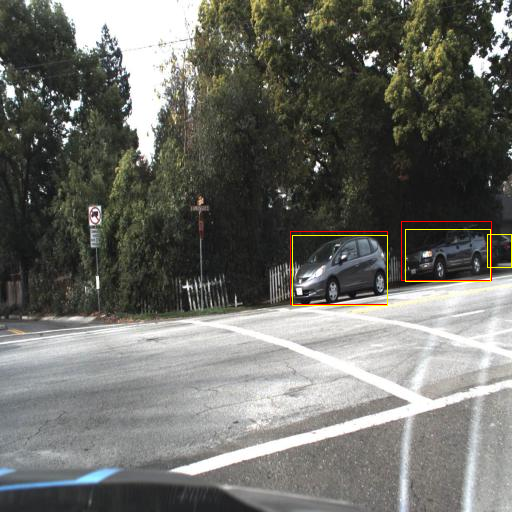

In [30]:
#Tonen van bounding boxes rond de auto's op 1 willekeurig gekozen image
#Auto's zijn class_id 1 in de truth label-file en class_id 2 in de predict label-file
#vervangen door https://stackoverflow.com/questions/23720875/opencv-draw-a-rectangle-around-a-region
import cv2
import random
from PIL import Image, ImageDraw

# Load the image
file_name = random.choice(os.listdir(sample_folder_predict))
image = Image.open(os.path.join(sample_folder_size_images, os.path.splitext(file_name)[0] + ".jpg"))
draw = ImageDraw.Draw(image)

print(file_name)
# Load corresponding truth-label file
with open(os.path.join(sample_folder_size_labels, file_name), 'r') as f:
    lines = f.readlines()
print(sample_folder_size_labels)
    
# Parse bounding box data and draw on the image
print("code vanuit truth labels-file")
for line in lines:
    print(line)
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    #class id 1 are cars,
    if class_id == 2:
        width *= image.width
        height *= image.height
        x_center *= image.width
        y_center *= image.height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2

        # Draw bounding box on the image
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red")

print ("")
# Load corresponding predict-label file
with open(os.path.join(sample_folder_predict, file_name), 'r') as f:
    lines = f.readlines()

# Read label file and draw bounding boxes
print("code vanuit predict labels-file")
for line in lines:
  print(line)
  class_id, x_center, y_center, width, height = map(float, line.strip().split())
  if class_id == 2:
      width *= image.width
      height *= image.height
      x_center *= image.width
      y_center *= image.height
      x_min = x_center - width / 2
      y_min = y_center - height / 2
      x_max = x_center + width / 2
      y_max = y_center + height / 2

      # Draw bounding box on the image
      draw.rectangle([x_min, y_min, x_max, y_max], outline="yellow")
# Show the image with bounding boxes
print("truth box rood")
print("predict box geel")
display(image)

In [31]:
#alle beelden van de sample overlopen en truth- en predict-bounding boxes erop tekenen (rond auto's zijnde class id = 1 (truth) en 2 (predict))
#Bounding box tonen rond de auto's voor de beide label-files: truth box rood, predict box geel
#saven in bounding_box_folder
import os
import cv2

def draw_bounding_boxes(image, labels, classes, kleur):
    global imagebb
    for label in labels:
        class_id, x_center, y_center, width, height = label
        if class_id in classes:
          width *= 518
          height *= 518
          x_center *= 518
          y_center *= 518
          x_min = int(x_center - width / 2)
          y_min = int(y_center - height / 2)
          x_max = int(x_center + width / 2)
          y_max = int(y_center + height / 2)

          # Draw bounding box on the image using OpenCV
          imagebb = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), kleur)

if not os.path.exists(bounding_box_folder):
   os.makedirs(bounding_box_folder)

#truth bounding boxes aanbrengen
image_files_truth = os.listdir(sample_folder_size_images)

for image_file in image_files_truth:
   truth_labels = []
   image = cv2.imread(os.path.join(sample_folder_size_images, image_file))
   label_path_truth = os.path.join(sample_folder_size_labels, f"{os.path.splitext(image_file)[0]}.txt")
   with open(label_path_truth, 'r') as file:
            truth_labels.extend(list(map(float, line.strip().split())) for line in file)
   draw_bounding_boxes(image, truth_labels, [2], (0, 0, 255))
   cv2.imwrite(os.path.join(bounding_box_folder, f"{os.path.splitext(image_file)[0]}.jpg"), image)

#predict bounding boxes aanbrengen

image_files_bounding = os.listdir(bounding_box_folder)

for image_file in image_files_bounding:
   predict_labels = []
   image = cv2.imread(os.path.join(bounding_box_folder, image_file))
   label_path_predict = os.path.join(sample_folder_predict, os.path.splitext(image_file)[0] + ".txt")
   if os.path.exists(label_path_predict):
      with open(label_path_predict, 'r') as file:
                predict_labels.extend(list(map(float, line.strip().split())) for line in file)
      draw_bounding_boxes(image, predict_labels, [2], (0, 255, 255))
      cv2.imwrite(os.path.join(bounding_box_folder, f"{os.path.splitext(image_file)[0]}.jpg"), image)

In [32]:
#controle
print("Number of images in the sample_folder_size_images folder:", len(os.listdir(sample_folder_size_images)))
print("Number of images in the bounding box folder:", len(os.listdir(bounding_box_folder)))

Number of images in the sample_folder_size_images folder: 504
Number of images in the bounding box folder: 504


## 1.2 Augmentation (schemering aanbrengen)

**TODO: beslissen over augmentatiecriteria**


general guidelines and starting points for adjusting brightness and contrast to simulate twilight conditions:

*   Reduce Overall Brightness: Twilight scenes are typically dimmer compared to
daylight scenes. You can achieve this by reducing the overall brightness of the image.

*   Adjust Contrast: In twilight conditions, the contrast between highlights and shadows tends to be lower compared to daylight. You can decrease the contrast to create a softer, more subdued appearance.

### 1.2.1 Schemering aanbrengen met OpenCV

1478898118362096260_jpg.rf.lT1RveMJlKoODjULBWSO.jpg



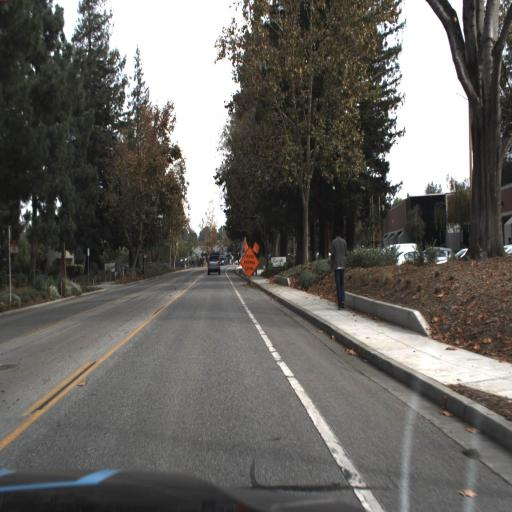
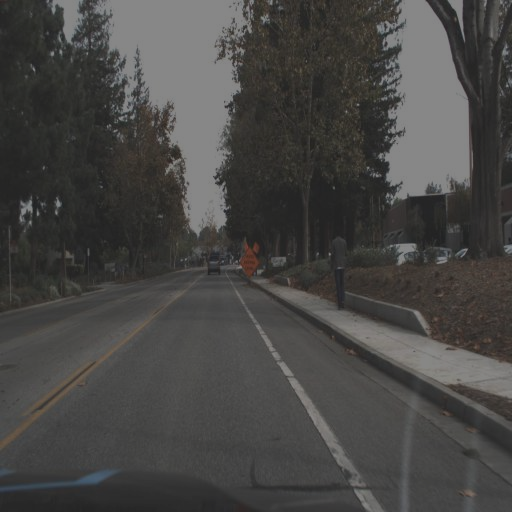
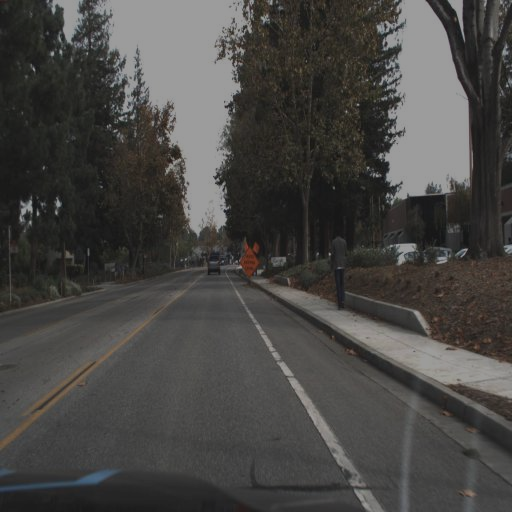
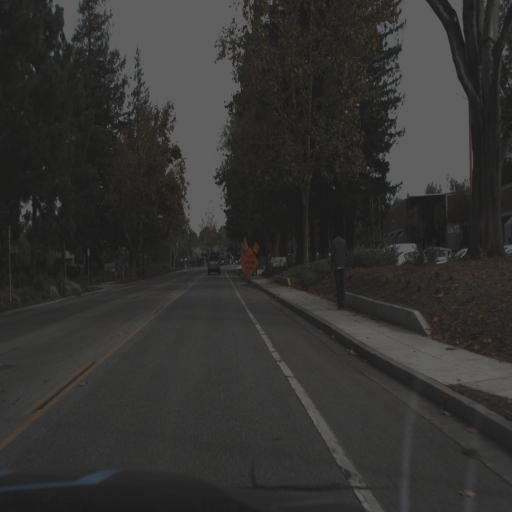
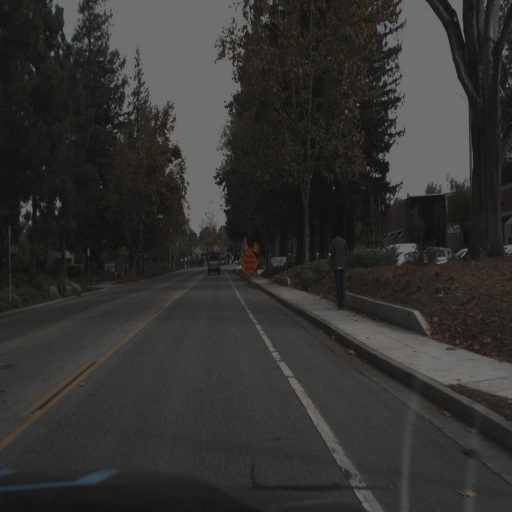

In [33]:
#basic example using OpenCV to adjust the brightness and contrast of an image to make it look duskier
#see https://www.tutorialspoint.com/how-to-change-the-contrast-and-brightness-of-an-image-using-opencv-in-python for an example
# alpha is the contrast value. To lower the contrast, use 0 < alpha < 1. And for higher contrast use alpha > 1.
# beta is the brightness value. A good range for brightness value is [-127, 127]
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageEnhance
from IPython.display import display, HTML
import io
import base64
import random
file_name = random.choice(os.listdir(sample_folder_size_images))
print(file_name)
image_path = os.path.join(sample_folder_size_images, os.path.splitext(file_name)[0] + ".jpg")


def adjust_brightness_contrast_side_by_side(image_path, contrast, brightness):
    # Open the image
    image = Image.open(image_path)
    
    # Adjust contrast
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(contrast)
    
    # Adjust brightness
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(1 + brightness / 100)  # Scale brightness appropriately
    
    return image

def adjust_brightness_contrast(image_path, alpha, beta):
    # Load the image
    image = Image.open(image_path)
    # Convert PIL Image to NumPy array
    image_np = np.array(image)
    # Adjust brightness and contrast
    adjusted_image_np = cv2.convertScaleAbs(image_np, alpha=alpha, beta=beta)
    return adjusted_image_np

def image_to_base64(image):
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

# Original Image
image = Image.open(image_path)
original_image_base64 = image_to_base64(image)

# Adjusted Images
adjustments = [
    {"contrast": 0.6, "brightness": -30, "description": "Duskier Image proposal contrast=0.6 brightness=-30"},
    {"contrast": 0.8, "brightness": -30, "description": "Duskier Image proposal contrast=0.8 brightness=-30"},
    {"contrast": 0.6, "brightness": -50, "description": "Duskier Image proposal contrast=0.6 brightness=-50"},
    {"contrast": 0.8, "brightness": -50, "description": "Duskier Image proposal contrast=0.8 brightness=-50"},
]

html_content = "<div style='display: flex; flex-wrap: wrap;'>"

# Original Image
html_content += "<div style='margin: 10px; text-align: center;'><p>Original Image</p>"
html_content += "<img src='data:image/png;base64,{}' style='max-width: 400px;'><br></div>".format(original_image_base64)

# Adjusted Images
for adj in adjustments:
    adjusted_image = adjust_brightness_contrast_side_by_side(image_path, adj["contrast"], adj["brightness"])
    adjusted_image_base64 = image_to_base64(adjusted_image)
    html_content += "<div style='margin: 10px; text-align: center;'><p>{}</p>".format(adj["description"])
    html_content += "<img src='data:image/png;base64,{}' style='max-width: 400px;'><br></div>".format(adjusted_image_base64)

html_content += "</div>"

display(HTML(html_content))

## 1.3 Training Sets aanmaken

### 1.3.1 Training Sets obv augmentatie

In [34]:
#Foto's willekerig opdelen in trainingsets (folders bevatten dan de labels en images die bij elkaar horen)
#1 ongewijzigde beelden
#2 lichte_augmentatie beelden
#3 zware_augmentatie beelden

import os
import random
import shutil

# Create training folders
if not os.path.exists(training_sets_folder):
       os.makedirs(training_sets_folder)

# Function to create folders if they don't exist
def create_folders(folders):
    for folder in folders:
        folder_path = os.path.join(training_sets_folder, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

# Target folders
target_folders = ["ongewijzigd", "lichte_augmentatie", "zware_augmentatie"]

# Create target folders
create_folders(target_folders)

# Function to divide images and corresponding labels into three folders randomly
def divide_images(target_folders):
    # Get the list of image files
    image_files = [f for f in os.listdir(sample_folder_size_images) if f.endswith('.jpg')]

    # Shuffle the image files randomly
    random.shuffle(image_files)

    # Calculate how many images to put in each folder
    images_per_folder = len(image_files) // len(target_folders)
    print("images_per_folder: ", images_per_folder)
    # Distribute images to folders
    for i, folder in enumerate(target_folders):
        start_index = i * images_per_folder
        end_index = start_index + images_per_folder if i < len(target_folders) - 1 else len(image_files)
        teller = 0
        for image_file in image_files[start_index:end_index]:
            source_path = os.path.join(sample_folder_size_images, image_file)
            target_path = os.path.join(os.path.join(training_sets_folder, folder), image_file)
            shutil.copy(source_path, target_path)
            # Load corresponding label file
            label_file = os.path.splitext(image_file)[0] + ".txt"
            label_path = os.path.join(sample_folder_size_labels, label_file)
            if not os.path.exists(label_path):
                print(f"Label file not found for {image_file}")
                continue
            target_path = os.path.join(os.path.join(training_sets_folder, folder), label_file)
            shutil.copy(label_path, target_path)
        teller = 0
# Divide images into three folders randomly
divide_images(target_folders)

print("Images and labels divided into three folders successfully.")

images_per_folder:  168
Images and labels divided into three folders successfully.


#### 1.3.1 Augmentatie toepassen in de folders overdag_augmentatie en augmentatie

In [35]:
import os

def adjust_images_in_folder(folder_path, alpha, beta):
    # loop over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.endswith('.jpg'):
            # Read the image
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                # Adjust brightness and contrast
                image = Image.open(image_path)
                image_np = np.array(image)
                adjusted_image_np = adjust_brightness_contrast(image_path,alpha, beta)
                #adjusted_image_np = cv2.convertScaleAbs(image_np, alpha=alpha, beta=beta)
                # Overwrite the original image
                cv2.imwrite(image_path, adjusted_image_np)
    print(f"Adjusted and overwritten: {folder_path}")

# Adjust images in the folders
adjust_images_in_folder(os.path.join(training_sets_folder, "lichte_augmentatie"), 0.8, -30)
adjust_images_in_folder(os.path.join(training_sets_folder, "zware_augmentatie"), 0.6, -50)

Adjusted and overwritten: ./sampleSize2000\training_sets\overdag_augmentatie
Adjusted and overwritten: ./sampleSize2000\training_sets\augmentatie


### 1.3.2 Training Sets verder opsplitsen obv treshhold

In [36]:
#Check of alle beelden wel een label-file hebben (anders kan je geen bounding boxes berekenen)
import os

def count_images_without_label(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    count_images_without_label = 0
    for file in image_files:
      # Load corresponding label file
      label_file = os.path.splitext(file)[0] + ".txt"
      label_path = os.path.join(folder_path, label_file)
      if not os.path.exists(label_path):
        count_images_without_label +=1
    return  count_images_without_label

print("aantal beelden zonder labelfile")
print(count_images_without_label(os.path.join(training_sets_folder, "ongewijzigd")))
print(count_images_without_label(os.path.join(training_sets_folder, "zware_augmentatie")))
print(count_images_without_label(os.path.join(training_sets_folder, "lichte_augmentatie")))

aantal beelden zonder labelfile
0
0
0


In [16]:
#tellen van auto's in 1 label-file
import os

def calculateNumberOfCars(label_file, class_ids):
    #returns the number of cars in the label_file
    number_cars = 0
    # Iterate through each line
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Parse label file
            label = line.strip().split()
            class_id = int(label[0])
            if class_id in class_ids:
              number_cars += 1
    return number_cars

In [17]:
#functie: gemiddelde en mediaan berekenen van aantal auto's per beeld in de folder
#returns a DataFrame containing IDs and their respective percentages, along with the total average percentage and median percentage across all files.
import os
import pandas as pd
import numpy as np

def calculate_total_average_median_percentage(source_folder):
    # Get list of label files
    label_files = [f for f in os.listdir(source_folder) if f.endswith('.txt')]
    total_average_percentage = 0

    # Create an empty list to store the data
    data = []

    # Iterate over label files and calculate percentage
    for idx, label_file in enumerate(label_files, start=1):
        label_path = os.path.join(source_folder, label_file)
        percentage = calculateNumberOfCars(label_path, [2])
        total_average_percentage += percentage
        data.append((idx, percentage))

    # Create DataFrame
    df = pd.DataFrame(data, columns=['ID', 'Percentage'])

    # Calculate total average percentage
    total_average_percentage /= len(label_files)

    # Calculate median percentage
    median_percentage = np.median(df['Percentage'])

    return df, total_average_percentage, median_percentage

In [39]:
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(sample_folder_size_labels)
print(f"Average number of cars in the folder {sample_folder_size_labels}:", total_average_percentage, "  median_number_of_cars:", median_percentage)
source_folder = os.path.join(training_sets_folder, "zware_augmentatie")
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(source_folder)
print(f"Average number of cars in the folder {source_folder}:", total_average_percentage, "  median_number_of_cars:", median_percentage)
source_folder = os.path.join(training_sets_folder, "lichte_augmentatie")
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(source_folder)
print(f"Average number of cars in the folder {source_folder}:", total_average_percentage, "  median_number_of_cars:", median_percentage)
source_folder = os.path.join(training_sets_folder, "ongewijzigd")
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(source_folder)
print(f"Average number of cars in the folder {source_folder}:", total_average_percentage, "  median_number_of_cars:", median_percentage)

Average number of cars in the folder ./sampleSize2000\labels: 4.430555555555555   median_number_of_cars: 4.0
Average number of cars in the folder ./sampleSize2000\training_sets\augmentatie: 4.589285714285714   median_number_of_cars: 4.0
Average number of cars in the folder ./sampleSize2000\training_sets\overdag_augmentatie: 4.273809523809524   median_number_of_cars: 4.0
Average number of cars in the folder ./sampleSize2000\training_sets\overdag: 4.428571428571429   median_number_of_cars: 4.0


In [ ]:
#grafische voorstelling van de verdeling
Niet uitvoeren wegens niet nodig
import matplotlib.pyplot as plt

# Specify number of bins for the histogram
num_bins = 10

# Plot histogram
plt.hist(df['Percentage'], bins=num_bins, edgecolor='black')

# Calculate median
median_percentage = df['Percentage'].median()

# Add vertical line for median
plt.axvline(median_percentage, color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Aantal')
plt.title('Histogram')

# Show median value
plt.text(median_percentage, plt.ylim()[1]*0.9, f'Median: {median_percentage:.2f}', color='red')

# Show plot
plt.show()

In [41]:
#trainingsets verder opdelen qua tresh-hold (bevatten labels en images)
#treshhold = aantal auto's per beeld
#Treshhold zetten zodat we gebalanceerde dataset bereiken

import os
import random
import shutil

# Target folders
target_folders = ["onder_de_grens", "boven_de_grens"]

# Function to create folders if they don't exist
def create_folders(training_sets_folder, folders):
    for folder in folders:
        folder_path = os.path.join(training_sets_folder, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

# Create target folders
create_folders(os.path.join(training_sets_folder, "ongewijzigd"),target_folders)
create_folders(os.path.join(training_sets_folder, "lichte_augmentatie"),target_folders)
create_folders(os.path.join(training_sets_folder, "zware_augmentatie"),target_folders)

def copy_images_based_on_threshold(source_folder, threshold):
    # Get list of label files in the source folder
    label_files = [f for f in os.listdir(source_folder) if f.endswith('.txt')]
    # Iterate through each image file
    for label_file in label_files:
        label_path = os.path.join(source_folder, label_file)
        image_file = os.path.splitext(label_file)[0] + ".jpg"
        # Decide which target folder to copy the image to based on brightness threshold
        if calculateNumberOfCars(label_path,[2]) > threshold:
            target_path_image = os.path.join(source_folder, "boven_de_grens", image_file)
            target_path_label = os.path.join(source_folder, "boven_de_grens", label_file)
        else:
            target_path_image = os.path.join(source_folder, "onder_de_grens", image_file)
            target_path_label = os.path.join(source_folder, "onder_de_grens", label_file)
        # Copy labelfile to the appropriate target folder
        shutil.copy(label_path, target_path_label)

        #copy image-file to the appropriate target folder
        source_path = os.path.join(source_folder, image_file)
        shutil.copy(source_path, target_path_image)

# Divide images into three folders randomly
copy_images_based_on_threshold(os.path.join(training_sets_folder, "ongewijzigd"),4)

copy_images_based_on_threshold(os.path.join(training_sets_folder, "lichte_augmentatie"),4)

copy_images_based_on_threshold(os.path.join(training_sets_folder, "zware_augmentatie"),4)


#tellingen en uitprinten aantal bestanden per folder
def count_files(folder_path):
  num_files = 0
  for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
      num_files += 1
  return num_files

#check op balans in de datasets
folder_path = os.path.join(training_sets_folder, "ongewijzigd","onder_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} images in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "ongewijzigd","boven_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "lichte_augmentatie","onder_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "lichte_augmentatie","boven_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "zware_augmentatie","onder_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "zware_augmentatie","boven_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
print("Met deze folders gaan we de predictie, training & validatie doen")

There are 98.0 images in the folder ./sampleSize2000\training_sets\overdag\onder_de_grens.
There are 70.0 files in the folder ./sampleSize2000\training_sets\overdag\boven_de_grens.
There are 97.0 files in the folder ./sampleSize2000\training_sets\overdag_augmentatie\onder_de_grens.
There are 71.0 files in the folder ./sampleSize2000\training_sets\overdag_augmentatie\boven_de_grens.
There are 99.0 files in the folder ./sampleSize2000\training_sets\augmentatie\onder_de_grens.
There are 69.0 files in the folder ./sampleSize2000\training_sets\augmentatie\boven_de_grens.
Met deze folders gaan we de predictie, training & validatie doen


# 2 Afhankelijke variabelen
*   IOU
*   aantal auto's


### 2.1 IoU

Intersection over Union measures the overlap between two bounding boxes, typically the predicted bounding box and the ground truth bounding box of an object. If the predicted bounding box overlaps perfectly with the ground truth bounding box, the IoU would be 1. If there's no overlap at all, the IoU would be 0.

Vele beelden hebben meerdere auto's dus meerdere boxen. Voor het bepalen van de IoU gaan we de truth-boxes 1 voor 1 vergelijken met de predicted boxes en enkel de box overhouden die hiermee maximaal matcht.


In [4]:
import statistics
#voorbeeld onder https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
def calculate_iou(gt_box, pred_box, eps=1e-7):
    """
    Calculates the IoU between two bounding boxes.
    Source code:https://docs.ultralytics.com/reference/utils/metrics/#ultralytics.utils.metrics.bbox_iou
    Args:
        gt_box (list): Ground truth bounding box (classid, x_center, y_center, width, height).
        pred_box (list): Predicted bounding box (classid, x_center, y_center, width, height).

    Returns:
        float: The IoU value between the two boxes.
    """
    # Extract coordinates for both boxes
    x1, y1, w1, h1  = map(float, gt_box.split()[1:])
    x2, y2, w2, h2 = map(float, pred_box.split()[1:])
    w1_, h1_, w2_, h2_ = w1 / 2, h1 / 2, w2 / 2, h2 / 2
    b1_x1, b1_x2, b1_y1, b1_y2 = x1 - w1_, x1 + w1_, y1 - h1_, y1 + h1_
    b2_x1, b2_x2, b2_y1, b2_y2 = x2 - w2_, x2 + w2_, y2 - h2_, y2 + h2_

    # Intersection area
    inter = (min(b1_x2,b2_x2) - max(b1_x1,b2_x1)) * (min(b1_y2,b2_y2) - max(b1_y1,b2_y1))

    # Union Area
    union = w1 * h1 + w2 * h2 - inter + eps

    # IoU
    iou = inter / union

    return iou


def calculate_multiple_iou(gt_boxes, pred_boxes):
    """
    Calculates IoU for each ground truth box and the best matching predicted box.

    Args:
        gt_boxes (list of lists): List of ground truth bounding boxes (classid, x_center, y_center, width, height).
        pred_boxes (list of lists): List of predicted bounding boxes (classid, x_center, y_center, width, height).

    Returns:
        list of floats: List of IoU values for each ground truth box.
    """

    iou_list = []
    with open(gt_boxes, 'r') as gt_file:
        gt_boxes = gt_file.readlines()
        for gt_box in gt_boxes:
            label_truth = gt_box.strip().split()
            class_id_truth = int(label_truth[0])
            if class_id_truth == 2:
              max_iou = 0.0
              best_pred_box = None
              with open(pred_boxes, 'r') as pred_file:
                  pred_boxes2 = pred_file.readlines()
                  for pred_box in pred_boxes2:
                      label_predict = pred_box.strip().split()
                      class_id_predict = int(label_predict[0])
                      if class_id_predict in [2]:
                          iou = calculate_iou(gt_box, pred_box)
                          if iou > max_iou:
                              max_iou = iou
                              best_pred_box = pred_box
              iou_list.append(max_iou)
    return iou_list

def calculate_IoU_Percentage(truth_folder, predict_folder):
    """
    Calculates detected car percentage for all labels in a folder
    Class_ids for the cars is 2
    Args:
        folder containing the labels
    Returns:
        list of percentages (length of list is the number of label-files)
    """
    outer_list = []
    # Get list of label files in the folder
    truth_label_files = [f for f in os.listdir(truth_folder) if f.endswith('.txt')]
    # Iterate through each label file
    for idx, label_file in enumerate(truth_label_files, start=1):
        truth_path_label = os.path.join(truth_folder, label_file)
        predict_path_label = os.path.join(predict_folder, label_file)
        #controle voor als Yolov8 geen labelfile heeft gemaakt wegens geen detectie
        if os.path.exists(predict_path_label):
            iou_list = calculate_multiple_iou(truth_path_label,predict_path_label)
        else:
            iou_list = [0]
        percentage =  statistics.mean(iou_list)
        outer_list.append((idx, percentage))
    return outer_list

In [5]:
#IoU berekenen obv de resultaten van de predictie
#per folder en per image vergelijken: ground truth is de training_sets folder
#dan een statistiek hierop trekken: per traningset gemiddelde, mediaan, standaardafwijking,....

def calculateIoU(truth_folder, predict_folder):
    outer_list = []
    # Get list of label files in the truth folder
    truth_files = [f for f in os.listdir(source_folder) if f.endswith('.txt')]
    # Iterate through each label file
    for truth_file in truth_files:
      predict_path = os.path.join(predict_folder, label_file)
      outer_list.append(calculate_multiple_iou(truth_folder, predict_path))
    return outer_list

2.2 auto's tellen

In [6]:
#vergelijken autotellingen uit 2 folders
import pandas as pd
import os

def calculateCarPercentage(truth_folder, predict_folder):
    """
    Calculates detected car percentage for all labels in a folder
    Class_ids for the cars is 2
    Args:
        folder containing the labels
    Returns:
        list of percentages (length of list is the number of label-files)
    """
    outer_list = []
    # Get list of label files in the folder
    truth_label_files = [f for f in os.listdir(truth_folder) if f.endswith('.txt')]
    # Iterate through each label file
    for idx, label_file in enumerate(truth_label_files, start=1):
        truth_path_label = os.path.join(truth_folder, label_file)
        truth_number_cars = calculateNumberOfCars(truth_path_label, [2])
        predict_path_label = os.path.join(predict_folder, label_file)
        #controle voor als Yolov8 geen labelfile heeft gemaakt wegens geen detectie
        if os.path.exists(predict_path_label):
            predict_number_cars = calculateNumberOfCars(predict_path_label, [2])
        else:
            predict_number_cars = 0
        if truth_number_cars != 0:
           percentage =  predict_number_cars/truth_number_cars
        else:
           percentage = 0
        outer_list.append((idx, percentage))
    return outer_list

## 2.3 Predictie door YoloV8 model

#### 2.3.1 IoU-resultaten van predictie YoloV8 model op 1 beeld

File name:  1478901324440865221_jpg.rf.26aad41989efeb09915fce2a4da08ec3.txt
Truth label file
2 0.0166015625 0.5810546875 0.033203125 0.1484375
2 0.0927734375 0.576171875 0.1396484375 0.1787109375
2 0.28515625 0.591796875 0.32421875 0.4228515625
2 0.5498046875 0.53125 0.111328125 0.0654296875
2 0.6982421875 0.5634765625 0.1689453125 0.18359375
2 0.76953125 0.5166015625 0.033203125 0.0732421875

Predict label file
9 0.318129 0.331556 0.0149564 0.0470028
2 0.7003 0.56894 0.158619 0.162927
2 0.552728 0.533763 0.110176 0.0546722
9 0.493239 0.329577 0.0156363 0.0459335
2 0.286288 0.601261 0.334849 0.428869
0 0.966633 0.541065 0.0320413 0.119142
2 0.761653 0.520192 0.0568493 0.0594489
9 0.929435 0.253488 0.0464756 0.14175
2 0.0795683 0.612656 0.114197 0.130252
2 0.0838471 0.586653 0.120119 0.180156
9 0.414141 0.328074 0.0150358 0.0442455
9 0.899089 0.199196 0.0211456 0.0938125
2 0.0849502 0.541317 0.118097 0.0874513

IoU boxes percentage:  [0.062018995289204654, 0.7715741309308161, 0.92658873

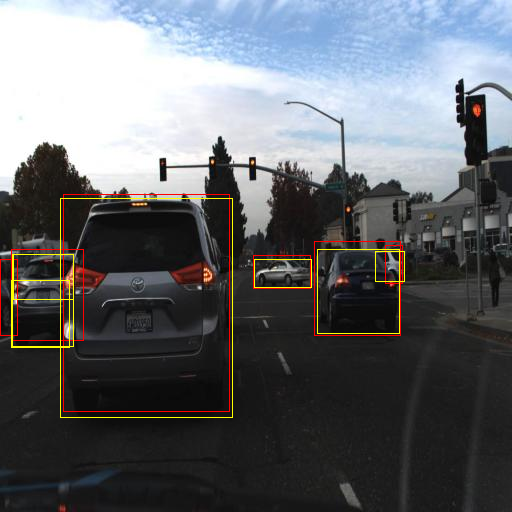

In [115]:
import statistics
file_name = random.choice(os.listdir(sample_folder_size_labels))
print("File name: ", file_name)

truth_file = os.path.join(sample_folder_size_labels, file_name)
predict_file = os.path.join(sample_folder_predict, file_name)

with open(truth_file, "r") as file:
    # Read the entire content of the file
    content = file.read()
    # Print the content
    print("Truth label file")
    print(content)

with open(predict_file, "r") as file:
    # Read the entire content of the file
    content = file.read()
    # Print the content
    print("Predict label file")
    print(content)


print("IoU boxes percentage: ", calculate_multiple_iou(truth_file,predict_file ))
print("Average: ",statistics.mean(calculate_multiple_iou(truth_file,predict_file )))
      
#Tonen van bounding boxes rond de auto's op 1 willekeurig gekozen image
#Auto's zijn class_id 1 in de truth label-file en class_id 2 in de predict label-file
#vervangen door https://stackoverflow.com/questions/23720875/opencv-draw-a-rectangle-around-a-region
import cv2
import random
from PIL import Image, ImageDraw

# Load the image
image = Image.open(os.path.join(sample_folder_size_images, os.path.splitext(file_name)[0] + ".jpg"))
draw = ImageDraw.Draw(image)

print(file_name)
# Load corresponding truth-label file
with open(os.path.join(sample_folder_size_labels, file_name), 'r') as f:
    lines = f.readlines()
    
# Parse bounding box data and draw on the image
for line in lines:
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    #class id 1 are cars,
    if class_id == 2:
        width *= image.width
        height *= image.height
        x_center *= image.width
        y_center *= image.height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2

        # Draw bounding box on the image
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red")

print ("")
# Load corresponding predict-label file
with open(os.path.join(sample_folder_predict, file_name), 'r') as f:
    lines = f.readlines()

# Read label file and draw bounding boxes
for line in lines:
  class_id, x_center, y_center, width, height = map(float, line.strip().split())
  if class_id == 2:
      width *= image.width
      height *= image.height
      x_center *= image.width
      y_center *= image.height
      x_min = x_center - width / 2
      y_min = y_center - height / 2
      x_max = x_center + width / 2
      y_max = y_center + height / 2

      # Draw bounding box on the image
      draw.rectangle([x_min, y_min, x_max, y_max], outline="yellow")
# Show the image with bounding boxes
print("truth box rood")
print("predict box geel")
display(image)

#### 2.3.2 Autotellingen-resultaten van predictie YoloV8 model op 1 beeld

File name:  1478732674218867444_jpg.rf.f2619c289f0708b38e870ffa1b96cafb.txt
code vanuit truth-labels-file
2 0.0673828125 0.5390625 0.134765625 0.1875

2 0.3125 0.5166015625 0.06640625 0.0771484375

2 0.3154296875 0.513671875 0.068359375 0.06640625

2 0.3525390625 0.50390625 0.044921875 0.087890625

2 0.53125 0.5107421875 0.0771484375 0.115234375

2 0.595703125 0.490234375 0.0302734375 0.056640625

2 0.638671875 0.5 0.076171875 0.09375

2 0.6396484375 0.4951171875 0.068359375 0.0703125

2 0.716796875 0.5263671875 0.1142578125 0.13671875

truth box rood
predict box geel


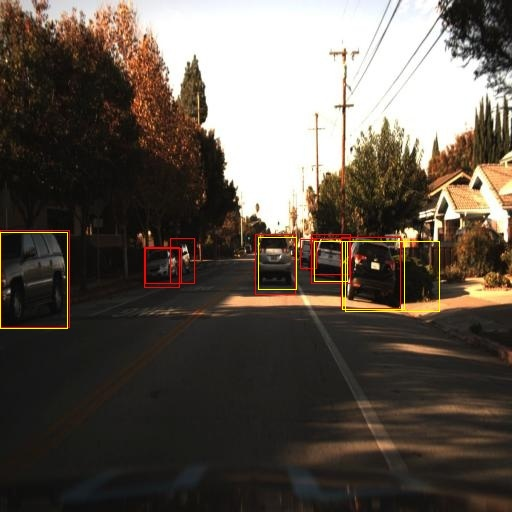

code vanuit predict-labels-file
2 0.0657084 0.541205 0.130755 0.185417

2 0.535803 0.508735 0.0734199 0.098929

2 0.75762 0.533666 0.182628 0.134379

2 0.639169 0.504978 0.0652456 0.0765398

0 0.361915 0.505559 0.0223913 0.062528

2 0.721121 0.531853 0.117985 0.131731

aantal auto's truth 9.
aantal auto's predict 5.
percentage herkende auto's: 0.5555555555555556


In [57]:
import os

file_name = random.choice(os.listdir(sample_folder_size_labels))
print("File name: ", file_name)

truth_file = os.path.join(sample_folder_size_labels, file_name)
predict_file = os.path.join(sample_folder_predict, file_name)

# Load and print label files
with open(truth_file, 'r') as f:
    lines = f.readlines()
    print("code vanuit truth-labels-file")
    for line in lines:
      print(line)

print("truth box rood")
print("predict box geel")

#display image
image = Image.open(os.path.join(bounding_box_folder , os.path.splitext(file_name)[0] + ".jpg"))
display(image)

with open(predict_file, 'r') as f:
    lines = f.readlines()
    print("code vanuit predict-labels-file")
    for line in lines:
      print(line)

truth_number_cars= calculateNumberOfCars(truth_file,[2])
predict_number_cars = calculateNumberOfCars(predict_file,[2])

print(f"aantal auto's truth {truth_number_cars}.")
print(f"aantal auto's predict {predict_number_cars}.")
print("percentage herkende auto's:", predict_number_cars/truth_number_cars)

### 2.3.3 Benchmarks aanmaken over alle datasets met YOLOv8 predict

Eerst de predict functie laten lopen over alle beelden heen van de 6 datasets

In [59]:
# Process each image file
# wegschrijven resultaten in Yolo_output/predict folders
# inhoud results zie https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.BaseTensor.to

folder_path = os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens")
project_path = os.path.join(sample_folder_size, "Yolo_output","predict","ongewijzigd/onder_de_grens")
model.predict(source=folder_path, save_txt = True, conf=0.5, exist_ok=True, project=project_path, name="predict")

folder_path = os.path.join(training_sets_folder, "ongewijzigd/boven_de_grens")
project_path = os.path.join(sample_folder_size, "Yolo_output","predict","ongewijzigd/boven_de_grens")
model.predict(source=folder_path, save_txt = True, conf=0.5, exist_ok=True, project=project_path, name="predict")

folder_path = os.path.join(training_sets_folder, "lichte_augmentatie/onder_de_grens")
project_path = os.path.join(sample_folder_size, "Yolo_output","predict","lichte_augmentatie/onder_de_grens")
model.predict(source=folder_path, save_txt = True, conf=0.5, exist_ok=True, project=project_path, name="predict")

folder_path = os.path.join(training_sets_folder, "lichte_augmentatie/boven_de_grens")
project_path = os.path.join(sample_folder_size, "Yolo_output","predict","lichte_augmentatie/boven_de_grens")
model.predict(source=folder_path, save_txt = True, conf=0.5, exist_ok=True, project=project_path, name="predict")

folder_path = os.path.join(training_sets_folder, "zware_augmentatie/onder_de_grens")
project_path = os.path.join(sample_folder_size, "Yolo_output","predict","zware_augmentatie/onder_de_grens")
model.predict(source=folder_path, save_txt = True, conf=0.5, exist_ok=True, project=project_path, name="predict")

folder_path = os.path.join(training_sets_folder, "zware_augmentatie/boven_de_grens")
project_path = os.path.join(sample_folder_size, "Yolo_output","predict","zware_augmentatie/boven_de_grens")
model.predict(source=folder_path, save_txt = True, conf=0.5, exist_ok=True, project=project_path, name="predict")


image 1/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478020198191412480_jpg.rf.YrgcVWG2WqCumTesyLcD.jpg: 640x640 (no detections), 66.5ms
image 2/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478020256192066071_jpg.rf.iySOhiXvtSLfBS7ECJIA.jpg: 640x640 (no detections), 43.4ms
image 3/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478020278191731673_jpg.rf.3a0d0eb7a42346f8227f78585140c73c.jpg: 640x640 (no detections), 50.6ms
image 4/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478020280197384728_jpg.rf.65c67dd409eb8a7d79c9a782014fa80c.jpg: 640x640 2 cars, 49.0ms
image 5/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478020313192115464_jpg.rf.18a617e3c810

image 40/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478896949502821481_jpg.rf.mlgTLwgJVsJi45RfVSNQ.jpg: 640x640 2 cars, 1 traffic light, 57.1ms
image 41/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478897054048810194_jpg.rf.d28c2ea23b05ddf97c33cec144d89a3d.jpg: 640x640 1 car, 54.6ms
image 42/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478897067188263043_jpg.rf.HOGZtS6hhnLE8UnaI5vp.jpg: 640x640 1 car, 55.3ms
image 43/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478897143741441333_jpg.rf.f68b334e3afd924e09888b13c5822b73.jpg: 640x640 2 cars, 1 traffic light, 56.5ms
image 44/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478897200870179712_jpg.rf.YIz

image 79/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478899995619906914_jpg.rf.ELOqJkEakbXeY58Non6p.jpg: 640x640 2 cars, 2 traffic lights, 75.2ms
image 80/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478899998476793624_jpg.rf.e32cee3302e9582c6e015fcca896188f.jpg: 640x640 2 cars, 2 traffic lights, 76.6ms
image 81/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478900012759125063_jpg.rf.bdGVHuAk3k05ODu6dca4.jpg: 640x640 1 fire hydrant, 69.5ms
image 82/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\1478900123588885275_jpg.rf.5db10d0934c55f58b0efcaf38c4c7361.jpg: 640x640 2 cars, 2 traffic lights, 59.7ms
image 83/98 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\onder_de_grens\

image 19/70 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\boven_de_grens\1478732133424528401_jpg.rf.115a5e5c0523622979ba8970ceadb5be.jpg: 640x640 3 cars, 1 traffic light, 59.2ms
image 20/70 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\boven_de_grens\1478732187904984905_jpg.rf.s7AZQvxrrw2585kb8WSg.jpg: 640x640 3 cars, 5 traffic lights, 62.5ms
image 21/70 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\boven_de_grens\1478732275076040513_jpg.rf.NiAhEBDUnuKFuOUDct76.jpg: 640x640 1 car, 50.1ms
image 22/70 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\boven_de_grens\1478732323820652294_jpg.rf.51056923b1110d95a661d02f6aff29a1.jpg: 640x640 3 traffic lights, 60.1ms
image 23/70 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\boven_de_grens\147873249070575363

image 59/70 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\boven_de_grens\1478899539159825292_jpg.rf.hJvsBi89oqTbWoFQ7OZW.jpg: 640x640 6 cars, 74.2ms
image 60/70 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\boven_de_grens\1478899607714846349_jpg.rf.bbc80ced1a21570b49876a7b38821a41.jpg: 640x640 2 persons, 3 cars, 66.5ms
image 61/70 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\boven_de_grens\1478899619711375757_jpg.rf.6de8edd3abe4dce82f920a4f02b1e422.jpg: 640x640 4 persons, 2 cars, 54.1ms
image 62/70 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\boven_de_grens\1478899691693546937_jpg.rf.7b5d971efdf9a5f30477008eb2307d7d.jpg: 640x640 6 cars, 37.5ms
image 63/70 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag\boven_de_grens\1478899739682849350_jpg.rf.8

image 25/97 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\onder_de_grens\1478895705805422953_jpg.rf.mceUfoSOwgtTVfKl3Bxl.jpg: 640x640 (no detections), 52.5ms
image 26/97 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\onder_de_grens\1478895707518912091_jpg.rf.taUCUGUgP0QUDdaKTxzt.jpg: 640x640 1 car, 49.1ms
image 27/97 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\onder_de_grens\1478895752080115745_jpg.rf.5457299a819bc301a9c82e083eee5d82.jpg: 640x640 1 car, 45.7ms
image 28/97 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\onder_de_grens\1478896198828897454_jpg.rf.20fb5d350a9dcb2db24892b54fbac7f5.jpg: 640x640 1 car, 60.3ms
image 29/97 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\onder_de_gr

image 62/97 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\onder_de_grens\1478898449138424085_jpg.rf.a20363b9dcee234b06032e2622930fa6.jpg: 640x640 (no detections), 67.4ms
image 63/97 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\onder_de_grens\1478898469134526034_jpg.rf.d4de603804fe66ac481e515c47bfa581.jpg: 640x640 (no detections), 64.2ms
image 64/97 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\onder_de_grens\1478898689653165870_jpg.rf.XNDocf6vSvnE6fUcV2VA.jpg: 640x640 (no detections), 71.8ms
image 65/97 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\onder_de_grens\1478898787342020454_jpg.rf.d3f9483f452bcee06d3b2f71a446ba4a.jpg: 640x640 (no detections), 43.6ms
image 66/97 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\tra


image 1/71 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\boven_de_grens\1478020249699425195_jpg.rf.94a0295fceae68b50ae5270e48b8b95f.jpg: 640x640 (no detections), 66.5ms
image 2/71 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\boven_de_grens\1478020336194602291_jpg.rf.17HCN4Al4ubnHpvlPy64.jpg: 640x640 1 car, 63.8ms
image 3/71 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\boven_de_grens\1478020354202050777_jpg.rf.9c7bcf28190b2dd7ae6f9c6a74f2687e.jpg: 640x640 (no detections), 47.8ms
image 4/71 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\boven_de_grens\1478020356195215549_jpg.rf.X2xWkLZAlYs6bkIFDRHi.jpg: 640x640 (no detections), 55.3ms
image 5/71 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augment

image 38/71 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\boven_de_grens\1478897155738276363_jpg.rf.bbd50c2961122e70e33ea2551dd3844f.jpg: 640x640 3 cars, 41.0ms
image 39/71 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\boven_de_grens\1478897269425230016_jpg.rf.Ab8Soze9LCD10AEGtfYY.jpg: 640x640 2 cars, 58.8ms
image 40/71 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\boven_de_grens\1478897272281608604_jpg.rf.GJ2hih9lvi9Ytuv6xGf3.jpg: 640x640 2 cars, 72.3ms
image 41/71 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\boven_de_grens\1478897287706402029_jpg.rf.7B7h9EksszGAmgX71Rbe.jpg: 640x640 2 cars, 75.5ms
image 42/71 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\overdag_augmentatie\boven_de_grens\14788972945631

image 4/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478020438202767876_jpg.rf.0817253c08f3d958276dab84b660f22b.jpg: 640x640 (no detections), 54.2ms
image 5/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478020620710189074_jpg.rf.QEhYDmcq6pgM815Fotjt.jpg: 640x640 (no detections), 57.6ms
image 6/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478020798214780235_jpg.rf.A0bXXzK1jf4T0xcFUjy3.jpg: 640x640 1 person, 50.4ms
image 7/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478020818219338393_jpg.rf.0ea0ae41d1ad93004b1569958a6d211d.jpg: 640x640 (no detections), 62.6ms
image 8/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\147802090122054008

image 43/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478897545929622520_jpg.rf.KFuTKMYTQgsZJOAbc71q.jpg: 640x640 (no detections), 61.1ms
image 44/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478897607629007752_jpg.rf.kTMjvsZblHqIVn1V6yOx.jpg: 640x640 1 truck, 65.1ms
image 45/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478897725887349028_jpg.rf.4dwlgDpA4HOekZptnFoT.jpg: 640x640 (no detections), 59.9ms
image 46/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478897741310145295_jpg.rf.39a27d3858ffb1a2f5c49381cd908e8a.jpg: 640x640 (no detections), 39.0ms
image 47/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478897964685220948_jpg.rf

image 82/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478900238989458750_jpg.rf.llq0QuO0R1mslNBMCmFw.jpg: 640x640 (no detections), 55.1ms
image 83/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478900301831946551_jpg.rf.gHJP2xR5TEW1tgRFKq2q.jpg: 640x640 (no detections), 59.1ms
image 84/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478900321826576438_jpg.rf.4823ff24c54d41e69cb859820ee9197b.jpg: 640x640 (no detections), 54.1ms
image 85/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478900442940525769_jpg.rf.e7c3feb235eac5311b4dd31d3a8555f0.jpg: 640x640 1 car, 53.7ms
image 86/99 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\onder_de_grens\1478900506352853

image 20/69 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\boven_de_grens\1478732491277771696_jpg.rf.56N6s6hL1QBQyA66ZXuE.jpg: 640x640 2 traffic lights, 65.9ms
image 21/69 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\boven_de_grens\1478732586476172460_jpg.rf.AuXD5dMfsQEccswheyAz.jpg: 640x640 (no detections), 60.7ms
image 22/69 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\boven_de_grens\1478732698305678917_jpg.rf.wOKAOppL7T6DtvgIDmTA.jpg: 640x640 (no detections), 71.9ms
image 23/69 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\boven_de_grens\1478732942036055939_jpg.rf.40edb4e3eeebd59e0a863315de46bfdc.jpg: 640x640 (no detections), 71.5ms
image 24/69 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\boven_de_grens\14787329558003664

image 59/69 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\boven_de_grens\1478899886503178468_jpg.rf.c288d2ae8d3ebf0fba0230cb09f14b6b.jpg: 640x640 (no detections), 60.6ms
image 60/69 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\boven_de_grens\1478899931635360031_jpg.rf.PWtaT9VGvRse2pbJP75G.jpg: 640x640 (no detections), 52.0ms
image 61/69 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\boven_de_grens\1478899939633400215_jpg.rf.hmBmV2Lr4o130sYaXxLd.jpg: 640x640 1 car, 39.5ms
image 62/69 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\boven_de_grens\1478900028754957811_jpg.rf.cd8547f6980ef18b34f6451e3456daff.jpg: 640x640 (no detections), 45.0ms
image 63/69 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize2000\training_sets\augmentatie\boven_de_grens\1478900469218578

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

### 2.3.3.1 IoU Benchmarks

In [9]:
import pandas as pd
truth_path = os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","ongewijzigd/onder_de_grens/predict/labels")
IOU_benchmark_ongewijzigd_onder_de_grens = calculate_IoU_Percentage(truth_path,predict_path)
print(IOU_benchmark_ongewijzigd_onder_de_grens)
# Find the tuple with the maximum second value
max_value_tuple = max(IOU_benchmark_ongewijzigd_onder_de_grens, key=lambda x: x[1])

# Print the result
print("Tuple with the maximum second value:", max_value_tuple)

# Create DataFrame for plotting and reference
df_IOU_benchmark_ongewijzigd_onder_de_grens= pd.DataFrame()
df_IOU_benchmark_ongewijzigd_onder_de_grens = pd.DataFrame(IOU_benchmark_ongewijzigd_onder_de_grens, columns=['ID', 'Percentage'])
df_IOU_benchmark_ongewijzigd_onder_de_grens['Benchmark'] = "IOU_ongewijzigd_onder_de_grens"

truth_path = os.path.join(training_sets_folder, "ongewijzigd/boven_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","ongewijzigd/boven_de_grens/predict/labels")
IOU_benchmark_ongewijzigd_boven_de_grens = calculate_IoU_Percentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_IOU_benchmark_ongewijzigd_boven_de_grens= pd.DataFrame()
df_IOU_benchmark_ongewijzigd_boven_de_grens = pd.DataFrame(IOU_benchmark_ongewijzigd_boven_de_grens, columns=['ID', 'Percentage'])
df_IOU_benchmark_ongewijzigd_boven_de_grens['Benchmark'] = "IOU_ongewijzigd_boven_de_grens"

truth_path = os.path.join(training_sets_folder, "lichte_augmentatie/onder_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","lichte_augmentatie/onder_de_grens/predict/labels")
IOU_benchmark_lichte_augmentatie_onder_de_grens = calculate_IoU_Percentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_IOU_benchmark_lichte_augmentatie_onder_de_grens= pd.DataFrame()
df_IOU_benchmark_lichte_augmentatie_onder_de_grens = pd.DataFrame(IOU_benchmark_lichte_augmentatie_onder_de_grens, columns=['ID', 'Percentage'])
df_IOU_benchmark_lichte_augmentatie_onder_de_grens['Benchmark'] = "IOU_lichte_augmentatie_onder_de_grens"

truth_path = os.path.join(training_sets_folder, "lichte_augmentatie/boven_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","lichte_augmentatie/boven_de_grens/predict/labels")
IOU_benchmark_lichte_augmentatie_boven_de_grens = calculate_IoU_Percentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_IOU_benchmark_lichte_augmentatie_boven_de_grens= pd.DataFrame()
df_IOU_benchmark_lichte_augmentatie_boven_de_grens = pd.DataFrame(IOU_benchmark_lichte_augmentatie_boven_de_grens, columns=['ID', 'Percentage'])
df_IOU_benchmark_lichte_augmentatie_boven_de_grens['Benchmark'] = "IOU_lichte_augmentatie_boven_de_grens"

truth_path = os.path.join(training_sets_folder, "zware_augmentatie/onder_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","zware_augmentatie/onder_de_grens/predict/labels")
IOU_benchmark_zware_augmentatie_onder_de_grens = calculate_IoU_Percentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_IOU_benchmark_zware_augmentatie_onder_de_grens= pd.DataFrame()
df_IOU_benchmark_zware_augmentatie_onder_de_grens = pd.DataFrame(IOU_benchmark_zware_augmentatie_onder_de_grens, columns=['ID', 'Percentage'])
df_IOU_benchmark_zware_augmentatie_onder_de_grens['Benchmark'] = "IOU_zware_augmentatie_onder_de_grens"


truth_path = os.path.join(training_sets_folder, "zware_augmentatie/boven_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","zware_augmentatie/boven_de_grens/predict/labels")
IOU_benchmark_zware_augmentatie_boven_de_grens = calculate_IoU_Percentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_IOU_benchmark_zware_augmentatie_boven_de_grens= pd.DataFrame()
df_IOU_benchmark_zware_augmentatie_boven_de_grens = pd.DataFrame(IOU_benchmark_zware_augmentatie_boven_de_grens, columns=['ID', 'Percentage'])
df_IOU_benchmark_zware_augmentatie_boven_de_grens['Benchmark'] = "IOU_zware_augmentatie_boven_de_grens"


df_IOU_benchmark= pd.DataFrame()
df_IOU_benchmark = pd.concat([df_IOU_benchmark_ongewijzigd_onder_de_grens, df_IOU_benchmark_ongewijzigd_boven_de_grens,
                          df_IOU_benchmark_lichte_augmentatie_onder_de_grens, df_IOU_benchmark_lichte_augmentatie_boven_de_grens,
                          df_IOU_benchmark_zware_augmentatie_onder_de_grens, df_IOU_benchmark_zware_augmentatie_boven_de_grens], ignore_index=True)

[(1, 0), (2, 0), (3, 0), (4, 0.6846460210766862), (5, 0), (6, 0.38549688506247615), (7, 0.3435289337345512), (8, 0.0), (9, 0.46199151042284264), (10, 0.24131723593658488), (11, 0), (12, 0.3888314425121905), (13, 0.706755066988337), (14, 0), (15, 0.0), (16, 0.37761171631738066), (17, 0.40249059837992324), (18, 0.1520639480080347), (19, 0.0), (20, 0), (21, 0), (22, 0.38176631522108445), (23, 0), (24, 0.8728861057635665), (25, 0.647778465140372), (26, 0.18968854415382963), (27, 0), (28, 0), (29, 0.5450321986976114), (30, 0.4138716279429028), (31, 0.0), (32, 0.645863272340044), (33, 0.7493003724841087), (34, 0), (35, 0.7706939305814275), (36, 4.424557051965562), (37, 0), (38, 0), (39, 0.47527467912525745), (40, 0.8717373482057965), (41, 0.3946374984235594), (42, 0.32611885130342516), (43, 0.8453572971650998), (44, 0.8463041394162365), (45, 0), (46, 0.4018200872619074), (47, 0.7891829869890393), (48, 0.6078473747526841), (49, 0.8000396454620686), (50, 0.21170018055820902), (51, 0.6357874321

NameError: name 'df_car_percentage' is not defined

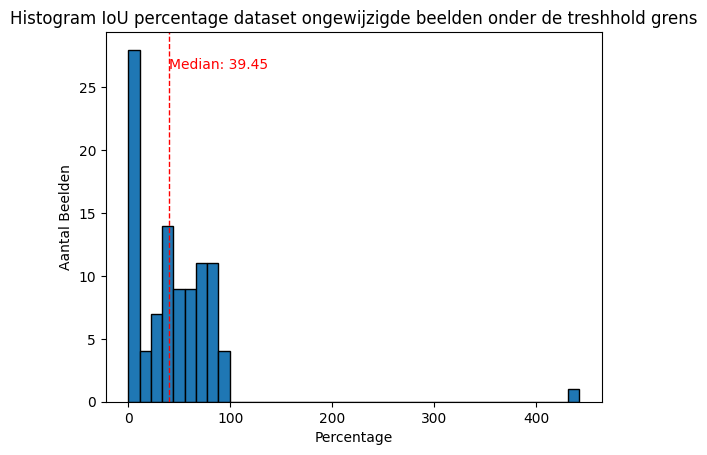

In [10]:
import matplotlib.pyplot as plt

# Specify number of bins for the histogram
num_bins = 40

# Plot histogram
plt.hist(df_IOU_benchmark_ongewijzigd_onder_de_grens['Percentage'] * 100, bins=num_bins, edgecolor='black')

# Calculate median
median_percentage = (df_IOU_benchmark_ongewijzigd_onder_de_grens['Percentage']* 100).median()

# Add vertical line for median
plt.axvline(median_percentage, color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Aantal Beelden')
plt.title('Histogram IoU percentage dataset ongewijzigde beelden onder de treshhold grens')

# Show median value
plt.text(median_percentage, plt.ylim()[1]*0.9, f'Median: {median_percentage:.2f}', color='red')

# Calculate number of unique IDs
num_unique_ids = df_car_percentage['ID'].nunique()

# Add legend
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, f'Number of images: {num_unique_ids}', fontsize=10)

# Show plot
plt.show()


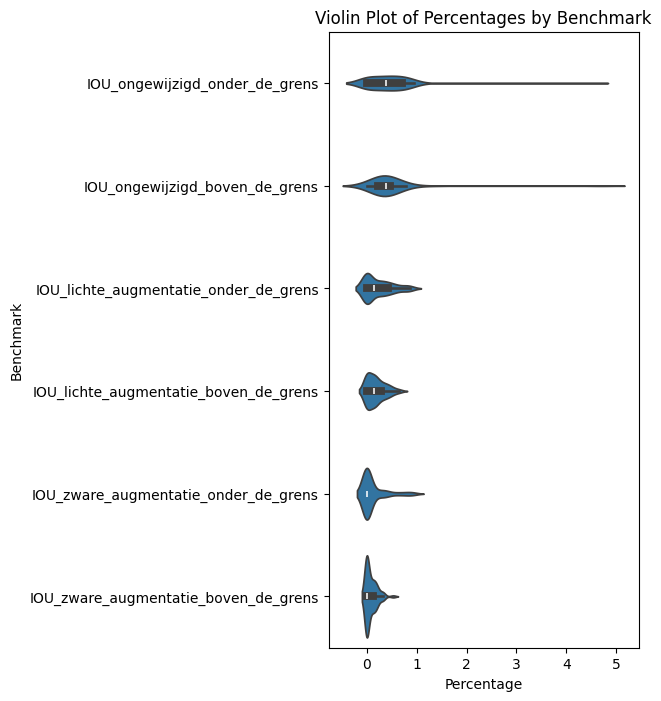

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot
#plt.figure(figsize=(6, 12))
#sns.boxplot(y='Benchmark', x='Percentage', data=df_benchmark)
#plt.ylabel('Benchmark')
#plt.xlabel('Percentage')
#plt.title('Box Plot of Percentages by Benchmark')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()

# Violin Plot ==> It shows the median, quartiles, and potential outliers. but also shows the density of the data at 
# different values. This can provide more insight into the distribution.
plt.figure(figsize=(4, 8))
sns.violinplot(y='Benchmark', x='Percentage', data=df_IOU_benchmark)
plt.ylabel('Benchmark')
plt.xlabel('Percentage')
plt.title('Violin Plot of Percentages by Benchmark')
plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
plt.show()

# Strip Plot
#plt.figure(figsize=(6, 12))
#sns.stripplot(y='Benchmark', x='Percentage', data=df_benchmark, jitter=True)
#plt.ylabel('Benchmark')
#plt.xlabel('Percentage')
#plt.title('Strip Plot of Percentages by Benchmark')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()

# Bar Plot of Means with Error Bars
#means = df_benchmark.groupby('Benchmark')['Percentage'].mean()
#stds = df_benchmark.groupby('Benchmark')['Percentage'].std()

#plt.figure(figsize=(6, 12))
#means.plot(kind='barh', xerr=stds, capsize=4, color='skyblue', edgecolor='black')
#plt.ylabel('Benchmark')
#plt.xlabel('Mean Percentage')
#plt.title('Mean Percentage by Benchmark with Error Bars')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()


### 2.3.3.2 NDC Benchmarks

In [21]:
import pandas as pd
truth_path = os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","ongewijzigd/onder_de_grens/predict/labels")
NDC_benchmark_ongewijzigd_onder_de_grens = calculateCarPercentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_NDC_benchmark_ongewijzigd_onder_de_grens= pd.DataFrame()
df_NDC_benchmark_ongewijzigd_onder_de_grens = pd.DataFrame(NDC_benchmark_ongewijzigd_onder_de_grens, columns=['ID', 'Percentage'])
df_NDC_benchmark_ongewijzigd_onder_de_grens['Benchmark'] = "NDC_ongewijzigd_onder_de_grens"

truth_path = os.path.join(training_sets_folder, "ongewijzigd/boven_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","ongewijzigd/boven_de_grens/predict/labels")
NDC_benchmark_ongewijzigd_boven_de_grens = calculateCarPercentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_NDC_benchmark_ongewijzigd_boven_de_grens= pd.DataFrame()
df_NDC_benchmark_ongewijzigd_boven_de_grens = pd.DataFrame(NDC_benchmark_ongewijzigd_boven_de_grens, columns=['ID', 'Percentage'])
df_NDC_benchmark_ongewijzigd_boven_de_grens['Benchmark'] = "NDC_ongewijzigd_boven_de_grens"

truth_path = os.path.join(training_sets_folder, "lichte_augmentatie/onder_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","lichte_augmentatie/onder_de_grens/predict/labels")
NDC_benchmark_lichte_augmentatie_onder_de_grens = calculateCarPercentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_NDC_benchmark_lichte_augmentatie_onder_de_grens= pd.DataFrame()
df_NDC_benchmark_lichte_augmentatie_onder_de_grens = pd.DataFrame(NDC_benchmark_lichte_augmentatie_onder_de_grens, columns=['ID', 'Percentage'])
df_NDC_benchmark_lichte_augmentatie_onder_de_grens['Benchmark'] = "NDC_lichte_augmentatie_onder_de_grens"

truth_path = os.path.join(training_sets_folder, "lichte_augmentatie/boven_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","lichte_augmentatie/boven_de_grens/predict/labels")
NDC_benchmark_lichte_augmentatie_boven_de_grens = calculateCarPercentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_NDC_benchmark_lichte_augmentatie_boven_de_grens= pd.DataFrame()
df_NDC_benchmark_lichte_augmentatie_boven_de_grens = pd.DataFrame(NDC_benchmark_lichte_augmentatie_boven_de_grens, columns=['ID', 'Percentage'])
df_NDC_benchmark_lichte_augmentatie_boven_de_grens['Benchmark'] = "NDC_lichte_augmentatie_boven_de_grens"

truth_path = os.path.join(training_sets_folder, "zware_augmentatie/onder_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","zware_augmentatie/onder_de_grens/predict/labels")
NDC_benchmark_zware_augmentatie_onder_de_grens = calculateCarPercentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_NDC_benchmark_zware_augmentatie_onder_de_grens= pd.DataFrame()
df_NDC_benchmark_zware_augmentatie_onder_de_grens = pd.DataFrame(NDC_benchmark_zware_augmentatie_onder_de_grens, columns=['ID', 'Percentage'])
df_NDC_benchmark_zware_augmentatie_onder_de_grens['Benchmark'] = "NDC_zware_augmentatie_onder_de_grens"


truth_path = os.path.join(training_sets_folder, "zware_augmentatie/boven_de_grens")
predict_path = os.path.join(sample_folder_size, "Yolo_output","predict","zware_augmentatie/boven_de_grens/predict/labels")
NDC_benchmark_zware_augmentatie_boven_de_grens = calculateCarPercentage(truth_path,predict_path)
# Create DataFrame for plotting and reference
df_NDC_benchmark_zware_augmentatie_boven_de_grens= pd.DataFrame()
df_NDC_benchmark_zware_augmentatie_boven_de_grens = pd.DataFrame(NDC_benchmark_zware_augmentatie_boven_de_grens, columns=['ID', 'Percentage'])
df_NDC_benchmark_zware_augmentatie_boven_de_grens['Benchmark'] = "NDC_zware_augmentatie_boven_de_grens"

df_NDC_benchmark= pd.DataFrame()
df_NDC_benchmark = pd.concat([df_NDC_benchmark_ongewijzigd_onder_de_grens, df_NDC_benchmark_ongewijzigd_boven_de_grens,
                          df_NDC_benchmark_lichte_augmentatie_onder_de_grens, df_NDC_benchmark_lichte_augmentatie_boven_de_grens,
                          df_NDC_benchmark_zware_augmentatie_onder_de_grens, df_NDC_benchmark_zware_augmentatie_boven_de_grens], ignore_index=True)

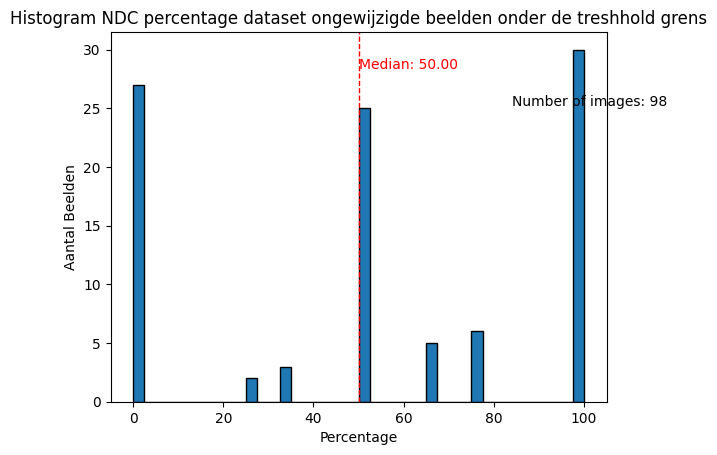

In [24]:
import matplotlib.pyplot as plt

# Specify number of bins for the histogram
num_bins = 40

# Plot histogram
plt.hist(df_NDC_benchmark_ongewijzigd_onder_de_grens['Percentage'] * 100, bins=num_bins, edgecolor='black')

# Calculate median
median_percentage = (df_NDC_benchmark_ongewijzigd_onder_de_grens['Percentage']* 100).median()

# Add vertical line for median
plt.axvline(median_percentage, color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Aantal Beelden')
plt.title('Histogram NDC percentage dataset ongewijzigde beelden onder de treshhold grens')

# Show median value
plt.text(median_percentage, plt.ylim()[1]*0.9, f'Median: {median_percentage:.2f}', color='red')

# Calculate number of unique IDs
num_unique_ids = df_NDC_benchmark_ongewijzigd_onder_de_grens['ID'].nunique()

# Add legend
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, f'Number of images: {num_unique_ids}', fontsize=10)

# Show plot
plt.show()


De mediaan is 50% herkenning
In 30 beelden is er perfecte herkenning
In 27 beelden worden er niets herkend

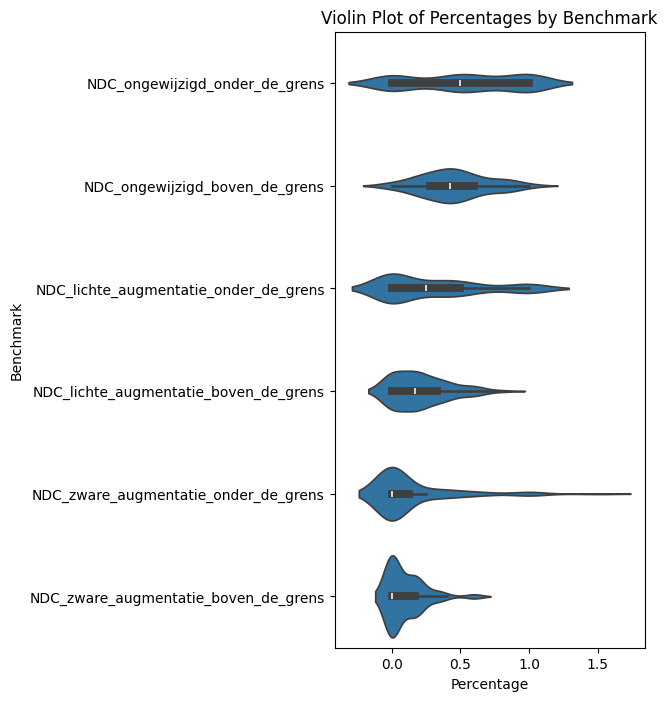

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot
#plt.figure(figsize=(6, 12))
#sns.boxplot(y='Benchmark', x='Percentage', data=df_NDC_benchmark)
#plt.ylabel('Benchmark')
#plt.xlabel('Percentage')
#plt.title('Box Plot of Percentages by Benchmark')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()

# Violin Plot ==> It shows the median, quartiles, and potential outliers. but also shows the density of the data at 
# different values. This can provide more insight into the distribution.
plt.figure(figsize=(4, 8))
sns.violinplot(y='Benchmark', x='Percentage', data=df_NDC_benchmark)
plt.ylabel('Benchmark')
plt.xlabel('Percentage')
plt.title('Violin Plot of Percentages by Benchmark')
plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
plt.show()

# Strip Plot
#plt.figure(figsize=(6, 12))
#sns.stripplot(y='Benchmark', x='Percentage', data=df_NDC_benchmark, jitter=True)
#plt.ylabel('Benchmark')
#plt.xlabel('Percentage')
#plt.title('Strip Plot of Percentages by Benchmark')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()

# Bar Plot of Means with Error Bars
#means = df_NDC_benchmark.groupby('Benchmark')['Percentage'].mean()
#stds = df_NDC_benchmark.groupby('Benchmark')['Percentage'].std()

#plt.figure(figsize=(6, 12))
#means.plot(kind='barh', xerr=stds, capsize=4, color='skyblue', edgecolor='black')
#plt.ylabel('Benchmark')
#plt.xlabel('Mean Percentage')
#plt.title('Mean Percentage by Benchmark with Error Bars')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()
